# Project name: Data Analyst Proficiency Insight: A Comprehensive Skills and Qualifications Analysis


**Name**: Thanapoom Phatthanaphan <br>
**CWID**: 20011296

## Introduction
In today's job market, there's a growing need for people who are good at data analysis. This demand is especially high in sectors like Banking, Media & Entertainment, and Healthcare, where working with big sets of data is common. Many individuals are keen on starting a career in technology, specifically as a data analyst.
However, becoming a data analyst involves learning various skills. To make things a bit tricky, different industries look for different skills. For those who are just starting out, figuring out which skills are most important can be a bit confusing.
Our project is here to help with that. We're collecting information from popular job websites and carefully studying job descriptions to figure out the main skills you need to be a successful data analyst. The goal is to make things easier for people who are just starting out, giving them a clear idea of the skills that really matter in the real world of data analysis jobs. This project is all about helping newcomers make smart choices when it comes to developing the skills they need to succeed in the field.

## Objectives and expected contributions

The primary objectives of this project are to facilitate individuals in discerning the pivotal skills requisite for a data analyst role and to offer comprehensive insights into the skill sets sought after by various industries. Employing the Python programming language, coupled with Natural Language Processing (NLP) techniques, we aspire to conduct a rigorous analysis of job descriptions pertinent to data analyst positions.

## Methodology

The project's methodology employs a multifaceted approach to achieve its objectives. Initially, Python libraries like BeautifulSoup and Scrapy are utilized for web scraping, enabling the extraction of relevant data from leading job websites featuring data analyst positions. Subsequently, the collected job descriptions undergo thorough preprocessing to ensure data integrity and suitability for analysis. This preprocessing includes removing rows with missing values, eliminating stopwords and punctuation, converting text to lowercase, and lemmatizing words to standardize the dataset. Following preprocessing, the dataset is segmented into unigrams and bigrams, facilitating a detailed analysis of individual words and adjacent word pairs. After that, we use Rule-based approach and Word Embeddings approach to match words in the job descriptions with predefined skill keywords then we select the one with better performance for identifying the relevant skills. Finally, the results are visualized to pinpoint which skills are in highest demand in the data analyst job market.

# Download and import the necessary libraries

In [ ]:
# Access to the drive that we want to work with and save the file
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Download necessary libraries
!pip install selenium
!pip install wordcloud
!pip install fuzzywuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.2/467.2 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.9 MB/s eta 0:00:00


In [ ]:
# Import necessary libraries
# Web Scraping
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException

# Time Recording
import time

# Data Analysis
import numpy as np
import pandas as pd

# Natural Language Processing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
import string
import spacy
from fuzzywuzzy import fuzz
from nltk.util import ngrams
from collections import defaultdict

# Data Visualization (Plotting)
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Word Embeddings
from gensim.models import Word2Vec
import gensim.downloader as api

# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


# 1) Data Collection

### Web Scraping
Scraped the job details from Indeed.com, and save to .csv file

In [ ]:
def getJobDescription(page_url_format, max_page):

    # Start the timer
    start = time.time()

    # Initialize the list to store the job details
    jobs_list = []
    job_search = 'data+analyst'
    location_search = 'United+States'

    # Iterate to open each page of the website
    for i in range(0, max_page):
        page_url = page_url_format.format(job_search, location_search, i*10)
        driver = webdriver.Chrome()
        driver.get(page_url)

        # Set the loading time for the webpage
        time.sleep(10)

        # Find the path of th data that we want to scrape
        job_page = driver.find_element(By.ID, 'mosaic-jobResults')
        jobs = driver.find_elements(By.CLASS_NAME, 'job_seen_beacon')

        # Iterate to get the job detail of each job
        for job in jobs:
            job_detail = []
            job_des_list = []

            # Get the job Title
            job_title = job.find_element(By.CLASS_NAME, 'jobTitle')
            job_detail.append(job_title.text)

            # Get the job link
            job_detail.append(job_title.find_element(By.CSS_SELECTOR, 'a').get_attribute('href'))

            # Get the company name
            job_detail.append(job.find_element(By.CLASS_NAME, 'css-92r8pb').text)

            # Get the location of the job
            job_detail.append(job.find_element(By.CLASS_NAME, 'css-1p0sjhy').text)

            # Click the job element
            job_title.click()

            # Set the loading time for the webpage
            time.sleep(8)

            # Get the job description
            try:
                job_des_list.append(driver.find_element(By.ID, 'jobDescriptionText').text)
            except:
                job_des_list.append(None)

            # Store the job detail in the list
            job_detail.append(job_des_list[0])
            jobs_list.append(job_detail)

    # Close the webpage
    driver.quit()

    # Stop the timer & Display the total execution time
    end = time.time()
    execution_time = end - start
    print(f"{execution_time} seconds to complete the task.")

    return jobs_list

In [ ]:
# initialize the webpage url
page_url_format = "https://www.indeed.com/jobs?q={}&l={}&start={}"

# Define the number of page we required for around 1,000 jobs (The website contains 15 jobs per page)
max_page = int(np.ceil(1000/15))

# Call the function to get the job details from the website
jobs_list = getJobDescription(page_url_format, max_page)

In [ ]:
# Create the DataFrame
columns_name = ['Position', 'Link', 'Company', 'Location', 'Job Description']
jobs_list_table = pd.DataFrame(jobs_list, columns=columns_name)

In [ ]:
# Save the DataFrame to .csv file
jobs_list_table.to_csv('jobs_list.csv', index=False)
print("The DataFrame has been saved.")

### Import the dataset
The dataset that we scraped from the website

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/jobs_list.csv')
df

Position  \
0            Board Certified Behavior Analyst   
1     Board Certified Behavior Analyst (BCBA)   
2     Board Certified Behavior Analyst (BCBA)   
3     Board Certified Behavior Analyst (BCBA)   
4                         Senior Data Analyst   
...                                       ...   
1000                         Data Analyst III   
1001          Remote Work - Need Data Analyst   
1002                    Data Labeling Analyst   
1003                       Music Data Analyst   
1004                             Data Analyst   

                                                   Link  \
0     https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...   
1     https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...   
2     https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...   
3     https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...   
4     https://www.indeed.com/rc/clk?jk=1e61371557d55...   
...                                                 ...   
1000  https://www.indeed.com/rc/clk?jk=fce643433ba74...   
1001  https://www.indeed.com/rc/clk?jk=0ed895a739175...   
1002  https://www.indeed.com/rc/clk?jk=4a0239d360f90...   
1003  https://www.indeed.com/rc/clk?jk=e0a4cbab9ec14...   
1004  https://www.indeed.com/rc/clk?jk=f0b5c06d61731...   

                                             Company  \
0                      Impact Learning & Development   
1                          Proven Behavior Solutions   
2     Keystone Autism and Behavior Interventions LLC   
3                             Pathways Autism Center   
4                                           Calendly   
...                                              ...   
1000                                 FedEx Dataworks   
1001                             Steneral Consulting   
1002                      Augmented Reality Concepts   
1003                                   1021 Creative   
1004                                 Cardinal Health   

                         Location  \
0            Rapid City, SD 57702   
1            West Bridgewater, MA   
2                   Hillsboro, OH   
3               Atlanta, GA 30328   
4     Remote in Atlanta, GA 30363   
...                           ...   
1000                United States   
1001      Remote in United States   
1002                United States   
1003                United States   
1004                United States   

                                        Job Description  
0     Job Description\nThe BCBA will provide support...  
1     PROVEN BEHAVIOR SOLUTIONS VOTED TOP PLACES TO ...  
2     Board Certified Behavior Analyst (in-home serv...  
3     Pathways Autism Center is currently hiring for...  
4     About the team & opportunity\nWhat's so great ...  
...                                                 ...  
1000  Under general supervision, designs and impleme...  
1001  Job Title: Data Analyst\n\nLocation: Remote\n\...  
1002  Description:\nLocation\nTbilisi, Georgia\n\nRe...  
1003  1021 Creative is seeking for a Music Data Anal...  
1004  What Data Analytics brings to Cardinal Health:...  

[1005 rows x 5 columns]

In [ ]:
# Check null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Position         1005 non-null   object
 1   Link             1005 non-null   object
 2   Company          1005 non-null   object
 3   Location         1005 non-null   object
 4   Job Description  1004 non-null   object
dtypes: object(5)
memory usage: 39.4+ KB


In [ ]:
# Remove the row with null values
df_no_na = df.dropna()
df_no_na

Position  \
0            Board Certified Behavior Analyst   
1     Board Certified Behavior Analyst (BCBA)   
2     Board Certified Behavior Analyst (BCBA)   
3     Board Certified Behavior Analyst (BCBA)   
4                         Senior Data Analyst   
...                                       ...   
1000                         Data Analyst III   
1001          Remote Work - Need Data Analyst   
1002                    Data Labeling Analyst   
1003                       Music Data Analyst   
1004                             Data Analyst   

                                                   Link  \
0     https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...   
1     https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...   
2     https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...   
3     https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...   
4     https://www.indeed.com/rc/clk?jk=1e61371557d55...   
...                                                 ...   
1000  https://www.indeed.com/rc/clk?jk=fce643433ba74...   
1001  https://www.indeed.com/rc/clk?jk=0ed895a739175...   
1002  https://www.indeed.com/rc/clk?jk=4a0239d360f90...   
1003  https://www.indeed.com/rc/clk?jk=e0a4cbab9ec14...   
1004  https://www.indeed.com/rc/clk?jk=f0b5c06d61731...   

                                             Company  \
0                      Impact Learning & Development   
1                          Proven Behavior Solutions   
2     Keystone Autism and Behavior Interventions LLC   
3                             Pathways Autism Center   
4                                           Calendly   
...                                              ...   
1000                                 FedEx Dataworks   
1001                             Steneral Consulting   
1002                      Augmented Reality Concepts   
1003                                   1021 Creative   
1004                                 Cardinal Health   

                         Location  \
0            Rapid City, SD 57702   
1            West Bridgewater, MA   
2                   Hillsboro, OH   
3               Atlanta, GA 30328   
4     Remote in Atlanta, GA 30363   
...                           ...   
1000                United States   
1001      Remote in United States   
1002                United States   
1003                United States   
1004                United States   

                                        Job Description  
0     Job Description\nThe BCBA will provide support...  
1     PROVEN BEHAVIOR SOLUTIONS VOTED TOP PLACES TO ...  
2     Board Certified Behavior Analyst (in-home serv...  
3     Pathways Autism Center is currently hiring for...  
4     About the team & opportunity\nWhat's so great ...  
...                                                 ...  
1000  Under general supervision, designs and impleme...  
1001  Job Title: Data Analyst\n\nLocation: Remote\n\...  
1002  Description:\nLocation\nTbilisi, Georgia\n\nRe...  
1003  1021 Creative is seeking for a Music Data Anal...  
1004  What Data Analytics brings to Cardinal Health:...  

[1004 rows x 5 columns]

In [ ]:
# Select only the column that we will use
data = df_no_na.loc[:, ['Job Description']]
data

Job Description
0     Job Description\nThe BCBA will provide support...
1     PROVEN BEHAVIOR SOLUTIONS VOTED TOP PLACES TO ...
2     Board Certified Behavior Analyst (in-home serv...
3     Pathways Autism Center is currently hiring for...
4     About the team & opportunity\nWhat's so great ...
...                                                 ...
1000  Under general supervision, designs and impleme...
1001  Job Title: Data Analyst\n\nLocation: Remote\n\...
1002  Description:\nLocation\nTbilisi, Georgia\n\nRe...
1003  1021 Creative is seeking for a Music Data Anal...
1004  What Data Analytics brings to Cardinal Health:...

[1004 rows x 1 columns]

# 2) Data Preprocessing
Apply NLP techniques to the text data into the suitable format

In [ ]:
def tokenization(doc):

    # Tokenize text
    tokens = nltk.word_tokenize(doc)

    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    punctuation = set(string.punctuation)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words and word not in punctuation]

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Convert word to lowercase
    lower_lemmatized_tokens = [token.lower() for token in lemmatized_tokens]

    return lower_lemmatized_tokens

In [ ]:
# Call the function to tokenize the text
data['Job Description'] = data['Job Description'].apply(tokenization)

In [ ]:
# Extract the data to get unigram and bigram
uni_bi_grams_dict = {'JD_uni_bi_grams': []}
for jd in data['Job Description']:
    unigrams = list(ngrams(jd, 1))
    bigrams = list(ngrams(jd, 2))
    uni_bi_grams = unigrams + bigrams
    uni_bi_grams_dict['JD_uni_bi_grams'].append(uni_bi_grams)

jd_uni_bi_grams = pd.DataFrame(uni_bi_grams_dict)

In [ ]:
jd_uni_bi_grams.head()

JD_uni_bi_grams
0  [(job,), (description,), (bcba,), (provide,), ...
1  [(proven,), (behavior,), (solutions,), (voted,...
2  [(board,), (certified,), (behavior,), (analyst...
3  [(pathways,), (autism,), (center,), (currently...
4  [(team,), (opportunity,), ('s,), (great,), (wo...

### Creating the reference of required skills
Build the reference of required skills by manually reading through 50 job posts to extract the requird skills and keywords.

In [ ]:
# Define the skills keywords
skill_keywords = {
    'Python': ['python'],
    'SQL': ['sql', 'structured query language'],
    'R': ['r'],
    'VBA': ['vba', 'visual basic'],
    'C': ['c'],
    'C++': ['c++'],
    'C#': ['c#'],
    'Java': ['java'],
    'JavaScript': ['javascript'],
    'HTML': ['html', 'hypertext markup language'],
    'Ruby': ['ruby'],
    'RDBMS': ['rdbms', 'relational database', 'postgressql', 'mysql', 'oracle',
              'sql server', 'sql', 'structured query language', 'access', 'query', 'querying'],
    'NoSQL': ['nosql', 'mongodb', 'cassandra'],
    'Access': ['access', 'ms access', 'microsoft access'],
    'Excel': ['excel', 'microsoft excel', 'ms excel'],
    'Word': ['word', 'ms word', 'microsoft word'],
    'PowerPoint': ['ppt', 'powerpoint', 'ms powerpoint', 'microsoft powerpoint'],
    'Sharepoint': ['sharepoint'],
    'ETL': ['etl'],
    'Oracle': ['oracle'],
    'Snowflake': ['snowflake'],
    'Tableau': ['tableau'],
    'PowerBI': ['power bi', 'bi'],
    'Looker': ['looker'],
    'QilkView': ['qilkview'],
    'MicroStrategy': ['microstrategy'],
    'Plotly': ['plotly'],
    'Matplotlib': ['matplotlib'],
    'Seaborn': ['seaborn'],
    'Pandas': ['pandas'],
    'NumPy': ['numpy'],
    'Statistics': ['statistics'],
    'Probability': ['probability'],
    'Hypothesis Testing': ['hypothesis testing'],
    'A/B Testing': ['a/b testing', 'ab testing'],
    'MATLAB': ['matlab'],
    'Time Series': ['time series', 'forecasting'],
    'Regression': ['regression'],
    'Classification': ['classification'],
    'Clustering': ['clustering'],
    'Predictive Modeling': ['predictive modeling'],
    'Tensorflow': ['tensorflow'],
    'Pytorch': ['pytorch'],
    'Scikit-Learn': ['scikit-learn'],
    'Hadoop': ['hadoop'],
    'Spark': ['spark'],
    'Hive': ['hive'],
    'Databricks': ['databricks'],
    'SAP': ['sap'],
    'SCM': ['scm', 'supply chain management'],
    'CRM': ['crm', 'customer relationship management', 'salesforce'],
    'ERP': ['erp', 'enterprise resource planning'],
    'SAAS': ['saas', 'software as a service'],
    'PeopleSoft': ['peoplesoft'],
    'Agile': ['agile'],
    'Teamwork': ['team-oriented environment', 'team-oriented', 'collaboration', 'cooperation',
                 'teamwork', 'team management', 'team environment', 'business partners',
                 'working relationships', 'team-centric', 'collaborative spirit'],
    'Presentation': ['presentation', 'present'],
    'Reporting': ['reporting', 'report'],
    'Verbal': ['verbal', 'oral', 'well-spoken'],
    'Written': ['writing', 'written'],
    'Detail-oriented': ['detail-oriented', 'attention to detail', 'eye for detail', 'accuracy'],
    'Motivation': ['motivation', 'ambition', 'willingness to learn', 'delivering result',
                   'continuous learning', 'self-motivation', 'work independently',
                   'self-motivated', 'self-learner', 'self-directed'],
    'Adaptability': ['adaptability', 'flexible', 'multitasking', 'fast-paced'],
    'Good attitude': ['attitude', 'self-learner', 'self-directed',
                      'under pressure', 'high-pressure'],
    'Problem-solving': ['problem-solving', 'problem solving'],
    'Critical-thinking': ['critical-thinking', 'critical-thinker', 'critical thinking'],
    'Time management': ['time management', 'timely manner', 'prioritize time',
                        'deadline-driven', 'meet deadlines'],
    'Project management': ['project management']
}

In [ ]:
# Initialize the dictionary for counting the skills
individual_skill_dict = {}
for skill in skill_keywords:
    individual_skill_dict[skill] = list(0 for i in range(len(jd_uni_bi_grams)))

# Create the dataframe from the dictionary
individual_skill_counts_df = pd.DataFrame.from_dict(individual_skill_dict)

In [ ]:
individual_skill_counts_df.head()

Python  SQL  R  VBA  C  C++  C#  Java  JavaScript  HTML  ...  Verbal  \
0       0    0  0    0  0    0   0     0           0     0  ...       0   
1       0    0  0    0  0    0   0     0           0     0  ...       0   
2       0    0  0    0  0    0   0     0           0     0  ...       0   
3       0    0  0    0  0    0   0     0           0     0  ...       0   
4       0    0  0    0  0    0   0     0           0     0  ...       0   

   Written  Detail-oriented  Motivation  Adaptability  Good attitude  \
0        0                0           0             0              0   
1        0                0           0             0              0   
2        0                0           0             0              0   
3        0                0           0             0              0   
4        0                0           0             0              0   

   Problem-solving  Critical-thinking  Time management  Project management  
0                0                  0                0                   0  
1                0                  0                0                   0  
2                0                  0                0                   0  
3                0                  0                0                   0  
4                0                  0                0                   0  

[5 rows x 68 columns]

# 3) Exploratory Data Analysis

## Rule-based approach

Count the required skills from unigrams and bigrams that we got in the previous step using Fuzzywuzzy.

In [ ]:
def fuzzy_match(text, keywords):

    """Function to perform fuzzy matching"""

    # Iterate over the keywords to match keyword with the highest similarity ratio to the text
    for keyword in keywords:
        score = fuzz.ratio(text, keyword)
        if score >= 90:
            return score
    return score


def count_skills_rule_based(gram_texts, skill_keywords, skill_counts_df):

    """Function to detect skills from the job descriptions using Rule-based approach"""

    # Start the timer
    start = time.time()

    # Iterate over the keywords and check for matches
    for i, words in enumerate(gram_texts):
        for word in words:
            for skill, keywords in skill_keywords.items():
                # Apply the fuzzy_match function to the current gram text and keyword
                score = fuzzy_match(word, keywords)
                if score >= 90:
                    skill_counts_df.loc[i, skill] = 1
        if (i + 1) % 5 == 0 or i == len(gram_texts) - 1:
            print(f"Done {i + 1} jobs")

    # Stop the timer & Display the total execution time
    end = time.time()
    execution_time = end - start
    print(f"{execution_time} seconds to complete the rule-based approach with {len(gram_texts)} jobs.")

    return skill_counts_df

# Build a list of words for skills detection
gram_texts = []
for grams_list in jd_uni_bi_grams['JD_uni_bi_grams']:
    temp_list = []
    for gram in grams_list:
        temp_list.append(" ".join(gram))
    gram_texts.append(temp_list)

# Call the function to count the required skills using Rule-based approach
individual_skill_counts_rule_based = count_skills_rule_based(gram_texts, skill_keywords, individual_skill_counts_df)

# Save to .csv file
individual_skill_counts_df.to_csv('/content/individual_skill_counts_rule_based.csv', index=False)
files.download('/content/individual_skill_counts_rule_based.csv')

Done 5 jobs
Done 10 jobs
Done 15 jobs
Done 20 jobs
Done 25 jobs
Done 30 jobs
Done 35 jobs
Done 40 jobs
Done 45 jobs
Done 50 jobs
Done 55 jobs
Done 60 jobs
Done 65 jobs
Done 70 jobs
Done 75 jobs
Done 80 jobs
Done 85 jobs
Done 90 jobs
Done 95 jobs
Done 100 jobs
Done 105 jobs
Done 110 jobs
Done 115 jobs
Done 120 jobs
Done 125 jobs
Done 130 jobs
Done 135 jobs
Done 140 jobs
Done 145 jobs
Done 150 jobs
Done 155 jobs
Done 160 jobs
Done 165 jobs
Done 170 jobs
Done 175 jobs
Done 180 jobs
Done 185 jobs
Done 190 jobs
Done 195 jobs
Done 200 jobs
Done 205 jobs
Done 210 jobs
Done 215 jobs
Done 220 jobs
Done 225 jobs
Done 230 jobs
Done 235 jobs
Done 240 jobs
Done 245 jobs
Done 250 jobs
Done 255 jobs
Done 260 jobs
Done 265 jobs
Done 270 jobs
Done 275 jobs
Done 280 jobs
Done 285 jobs
Done 290 jobs
Done 295 jobs
Done 300 jobs
Done 305 jobs
Done 310 jobs
Done 315 jobs
Done 320 jobs
Done 325 jobs
Done 330 jobs
Done 335 jobs
Done 340 jobs
Done 345 jobs
Done 350 jobs
Done 355 jobs
Done 360 jobs
Done 365 job

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Import the dataset that has already counted the skills
# individual_skill_counts_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/individual_skill_counts_rule_based.csv')

In [ ]:
# Check the dataset
individual_skill_counts_rule_based.head(10)

Python  SQL  R  VBA  C  C++  C#  Java  JavaScript  HTML  ...  Verbal  \
0       0    0  0    0  0    0   0     0           0     0  ...       1   
1       0    0  0    0  0    0   0     0           0     0  ...       0   
2       0    0  0    0  0    0   0     0           0     0  ...       1   
3       0    0  0    0  0    0   0     0           0     0  ...       0   
4       1    1  0    0  0    0   0     0           0     0  ...       0   
5       0    0  0    0  0    0   0     0           0     0  ...       1   
6       0    1  0    0  0    0   0     0           0     0  ...       1   
7       1    1  0    0  0    0   0     0           0     0  ...       1   
8       1    1  0    0  0    0   0     0           0     0  ...       0   
9       1    1  0    0  0    0   0     0           0     0  ...       0   

   Written  Detail-oriented  Motivation  Adaptability  Good attitude  \
0        1                0           0             1              0   
1        0                0           1             1              0   
2        1                0           0             1              0   
3        0                0           0             1              1   
4        1                0           0             0              0   
5        1                1           0             1              0   
6        1                0           0             0              0   
7        1                1           1             1              0   
8        1                1           1             0              1   
9        1                0           0             1              0   

   Problem-solving  Critical-thinking  Time management  Project management  
0                0                  0                0                   0  
1                0                  0                1                   0  
2                0                  0                1                   0  
3                0                  0                0                   0  
4                0                  0                0                   0  
5                0                  0                0                   0  
6                1                  0                0                   0  
7                1                  0                0                   1  
8                1                  1                1                   0  
9                0                  0                1                   0  

[10 rows x 68 columns]

In [ ]:
# Get the sum of required skills for each individual skill from rule-based approach
sum_skills = {}
for skill in skill_keywords:
    sum_skills[skill] = individual_skill_counts_rule_based[skill].sum()
sum_skills_rule_based = pd.DataFrame(sum_skills, index=['Number of jobs'])

# Show the number of jobs require the specific skills by each skill from rule-based approach
rearranged_sum_skills_rule_based = sum_skills_rule_based.T.sort_values(by='Number of jobs', ascending=False)
rearranged_sum_skills_rule_based['%Percentage (1,004 jobs)'] = (rearranged_sum_skills_rule_based['Number of jobs']*100/len(individual_skill_counts_rule_based)).round(2).astype(str) + '%'
rearranged_sum_skills_rule_based.head(10)

Number of jobs %Percentage (1,004 jobs)
Reporting                   774                   77.09%
RDBMS                       676                   67.33%
Teamwork                    583                   58.07%
SQL                         493                    49.1%
Written                     482                   48.01%
Detail-oriented             430                   42.83%
Presentation                395                   39.34%
Excel                       389                   38.75%
Verbal                      353                   35.16%
Adaptability                343                   34.16%

**Bar chart**: Display the distribution of required skills in 1,004 Data Analyst jobs (Rule-based approach)

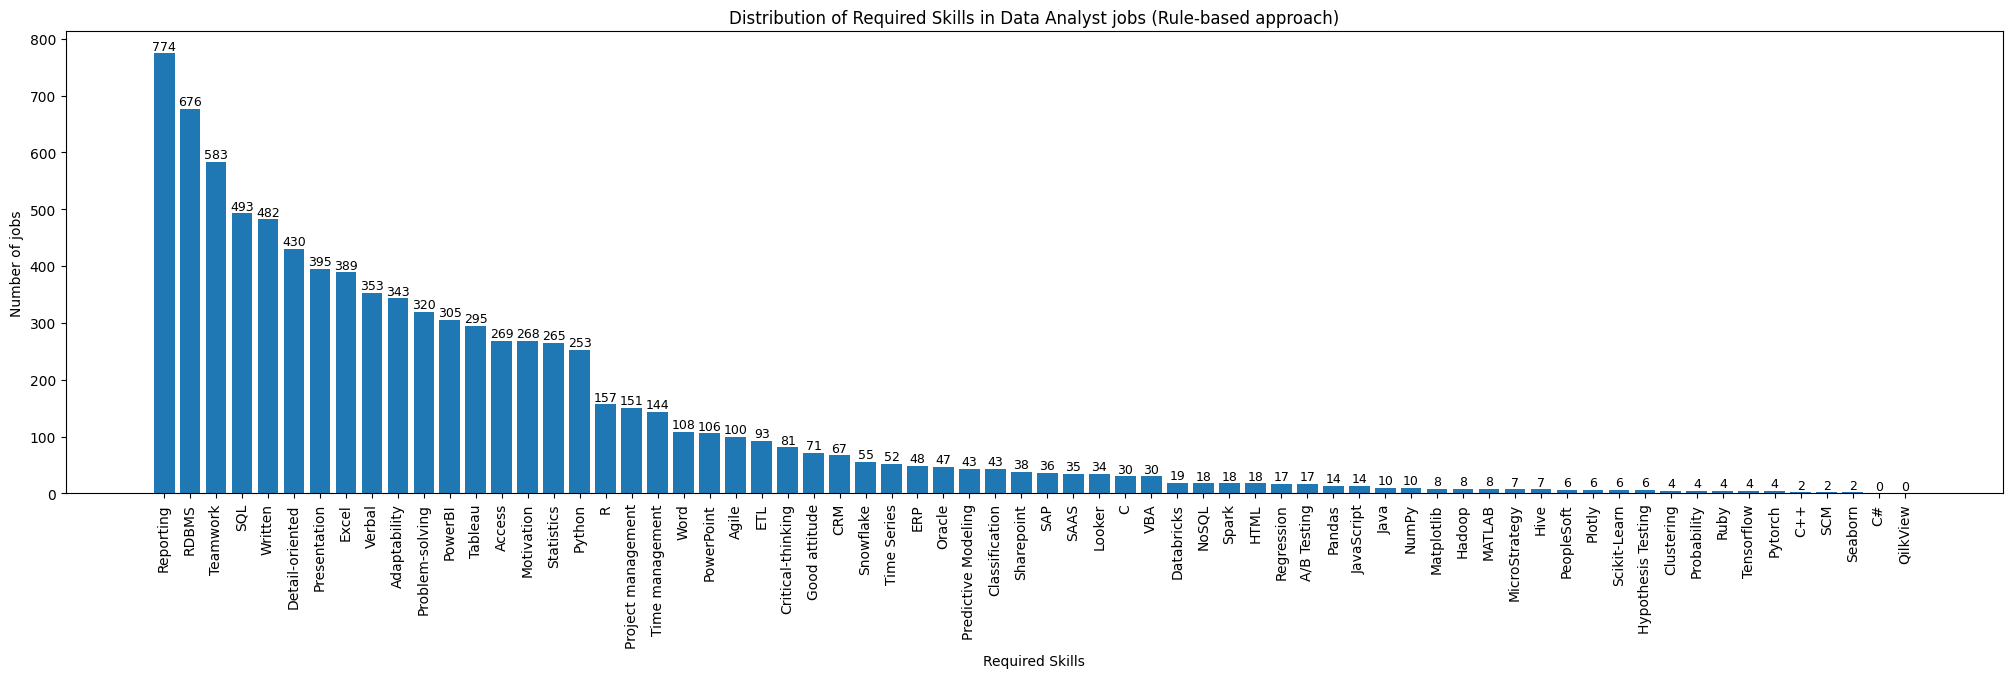

In [ ]:
plt.figure(figsize=(25, 6))
plt.xticks(rotation=90, fontsize=10)
for i, value in enumerate(rearranged_sum_skills_rule_based['Number of jobs']):
    plt.text(i, value + 1, str(value), ha='center', va='bottom', fontsize=9)

plt.bar(rearranged_sum_skills_rule_based.index, rearranged_sum_skills_rule_based['Number of jobs'], align='center')
plt.xlabel('Required Skills')
plt.ylabel('Number of jobs')
plt.title('Distribution of Required Skills in Data Analyst jobs (Rule-based approach)')
plt.show()

**Word cloud**: Display the top required skills for Data Analyst jobs (Rule-based approach)

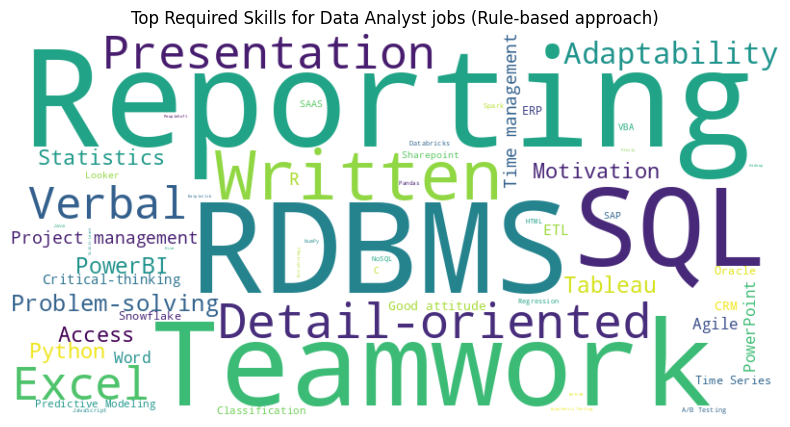

In [ ]:
sum_individual_skills_dict = dict(zip(rearranged_sum_skills_rule_based.index, rearranged_sum_skills_rule_based['Number of jobs']))
sum_individual_skills_wordcloud_rule_based = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(sum_individual_skills_dict)
plt.figure(figsize=(10, 5))
plt.imshow(sum_individual_skills_wordcloud_rule_based, interpolation='bilinear')
plt.axis('off')
plt.title('Top Required Skills for Data Analyst jobs (Rule-based approach)')
plt.show()

## Word Embeddings approach

In [ ]:
# Train Word2Vec model
# word2vec_model = Word2Vec(sentences=data['Job Description'], vector_size=300, window=2, min_count=1, workers=4)
model = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
def get_vector_unique_corpus(uni_bi_grams, model):

    """Function to build the dictionary of unique words and get the vector of each word."""

    # Iterate to get the vector of each unique word.
    corpus_dict = {}
    for grams_list in uni_bi_grams['JD_uni_bi_grams']:
        for gram in grams_list:
            word = " ".join(gram)
            if word not in corpus_dict:
                if word in model.key_to_index:
                    corpus_dict[word] = model[word]

    return corpus_dict

# Call the function to get the vector of the unique words
unique_corpus = get_vector_unique_corpus(jd_uni_bi_grams, model)
unique_corpus

{'job': array([-1.45874023e-02, -4.83398438e-02, -1.36718750e-01, -1.76757812e-01,
         3.39355469e-02, -1.30615234e-02,  7.76367188e-02, -2.73132324e-03,
        -2.09960938e-02,  1.39648438e-01,  2.38281250e-01, -9.76562500e-02,
        -3.88183594e-02, -2.12890625e-01, -1.85546875e-01,  2.44140625e-01,
         6.73828125e-02,  1.89453125e-01,  1.86523438e-01, -2.96875000e-01,
        -9.37500000e-02,  9.32617188e-02,  5.93261719e-02,  2.58789062e-02,
        -7.29370117e-03,  1.26953125e-01, -2.73437500e-01, -1.66015625e-02,
         1.28173828e-02,  9.03320312e-02, -6.88476562e-02, -2.30712891e-02,
         6.34765625e-02,  2.91748047e-02,  7.61718750e-02,  1.20117188e-01,
         4.05273438e-02, -5.34057617e-03, -1.15234375e-01,  1.43554688e-01,
         3.06701660e-03, -1.96289062e-01,  1.86523438e-01, -1.29882812e-01,
        -2.45117188e-01, -4.41894531e-02,  6.22558594e-02,  5.17578125e-02,
        -1.35742188e-01,  1.85546875e-01,  1.27929688e-01,  5.24520874e-05,
     

In [ ]:
# Initialize the dataframe to countthe required skills
individual_skill_counts_word_embeddings = individual_skill_counts_df.copy()

In [ ]:
def count_skills_word_embeddings(job_descriptions, skill_keywords, model, skill_counts_df):

    """Function to detect skills from the job descriptions using Rule-based approach"""

    # Start the timer
    start = time.time()

    # Iterate over the skill keyword and detect the keyword from job descriptions
    lemmatizer = WordNetLemmatizer()
    for i, words in enumerate(job_descriptions['JD_uni_bi_grams']):
        for word in words:
            for skill in skill_keywords.keys():
                converted_skill = lemmatizer.lemmatize(skill.lower())
                if converted_skill in model.key_to_index and word in model.key_to_index:
                    sim_score = model.similarity(word, converted_skill)
                    if sim_score > 0.5:
                        skill_counts_df.loc[i, skill] = 1
        if (i + 1) % 5 == 0 or i == len(job_descriptions) - 1:
            print(f"Done {i + 1} jobs")

    # Stop the timer & Display the total execution time
    end = time.time()
    execution_time = end - start
    print(f"{execution_time} seconds to complete the word embeddings approach with {len(job_descriptions)} jobs.")

    return skill_counts_df

# Call the function to count the required skills using word embeddings approach
individual_skill_counts_word_embeddings = count_skills_word_embeddings(jd_uni_bi_grams, skill_keywords, model, individual_skill_counts_df)

# Save to .csv file
individual_skill_counts_word_embeddings.to_csv('/content/individual_skill_counts_word_embeddings.csv', index=False)
files.download('/content/individual_skill_counts_word_embeddings.csv')

Done 5 jobs
Done 10 jobs
Done 15 jobs
Done 20 jobs
Done 25 jobs
Done 30 jobs
Done 35 jobs
Done 40 jobs
Done 45 jobs
Done 50 jobs
Done 55 jobs
Done 60 jobs
Done 65 jobs
Done 70 jobs
Done 75 jobs
Done 80 jobs
Done 85 jobs
Done 90 jobs
Done 95 jobs
Done 100 jobs
Done 105 jobs
Done 110 jobs
Done 115 jobs
Done 120 jobs
Done 125 jobs
Done 130 jobs
Done 135 jobs
Done 140 jobs
Done 145 jobs
Done 150 jobs
Done 155 jobs
Done 160 jobs
Done 165 jobs
Done 170 jobs
Done 175 jobs
Done 180 jobs
Done 185 jobs
Done 190 jobs
Done 195 jobs
Done 200 jobs
Done 205 jobs
Done 210 jobs
Done 215 jobs
Done 220 jobs
Done 225 jobs
Done 230 jobs
Done 235 jobs
Done 240 jobs
Done 245 jobs
Done 250 jobs
Done 255 jobs
Done 260 jobs
Done 265 jobs
Done 270 jobs
Done 275 jobs
Done 280 jobs
Done 285 jobs
Done 290 jobs
Done 295 jobs
Done 300 jobs
Done 305 jobs
Done 310 jobs
Done 315 jobs
Done 320 jobs
Done 325 jobs
Done 330 jobs
Done 335 jobs
Done 340 jobs
Done 345 jobs
Done 350 jobs
Done 355 jobs
Done 360 jobs
Done 365 job

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Check the dataset
individual_skill_counts_word_embeddings.head(10)

Python  SQL  R  VBA  C  C++  C#  Java  JavaScript  HTML  ...  Verbal  \
0       0    0  0    0  0    0   0     0           0     0  ...       1   
1       0    0  0    0  0    0   0     0           0     0  ...       0   
2       0    0  0    0  0    0   0     0           0     0  ...       1   
3       0    0  0    0  0    0   0     0           0     0  ...       0   
4       1    1  0    0  0    0   0     0           0     0  ...       0   
5       0    0  0    0  0    0   0     0           0     0  ...       1   
6       0    1  0    0  0    0   0     0           0     0  ...       1   
7       1    1  0    0  0    0   0     0           0     0  ...       1   
8       1    1  0    0  0    0   0     0           0     0  ...       0   
9       1    1  0    0  0    0   0     0           0     0  ...       0   

   Written  Detail-oriented  Motivation  Adaptability  Good attitude  \
0        1                0           0             1              0   
1        0                0           1             1              0   
2        1                0           0             1              0   
3        0                0           0             1              1   
4        1                0           0             0              0   
5        1                1           0             1              0   
6        1                0           0             0              0   
7        1                1           1             1              0   
8        1                1           1             0              1   
9        1                0           0             1              0   

   Problem-solving  Critical-thinking  Time management  Project management  
0                0                  0                0                   0  
1                0                  0                1                   0  
2                0                  0                1                   0  
3                0                  0                0                   0  
4                0                  0                0                   0  
5                0                  0                0                   0  
6                1                  0                0                   0  
7                1                  0                0                   1  
8                1                  1                1                   0  
9                0                  0                1                   0  

[10 rows x 68 columns]

In [ ]:
# Get the sum of required skills for each individual skill from word embeddings approach
sum_skills = {}
for skill in skill_keywords:
    sum_skills[skill] = individual_skill_counts_word_embeddings[skill].sum()
sum_skills_word_embeddings = pd.DataFrame(sum_skills, index=['Number of jobs'])

# Show the number of jobs require the specific skills by each skill from word embeddings approach
rearranged_sum_skills_word_embeddings = sum_skills_word_embeddings.T.sort_values(by='Number of jobs', ascending=False)
rearranged_sum_skills_word_embeddings['%Percentage (1,004 jobs)'] = (rearranged_sum_skills_word_embeddings['Number of jobs']*100/len(individual_skill_counts_word_embeddings)).round(2).astype(str) + '%'
rearranged_sum_skills_word_embeddings.head(10)

Number of jobs %Percentage (1,004 jobs)
Reporting                   774                   77.09%
RDBMS                       676                   67.33%
Teamwork                    583                   58.07%
SQL                         493                    49.1%
Written                     482                   48.01%
Detail-oriented             430                   42.83%
Presentation                395                   39.34%
Excel                       389                   38.75%
Verbal                      353                   35.16%
Adaptability                343                   34.16%

**Bar chart**: Display the distribution of required skills in 1,004 Data Analyst jobs (Word embeddings approach)

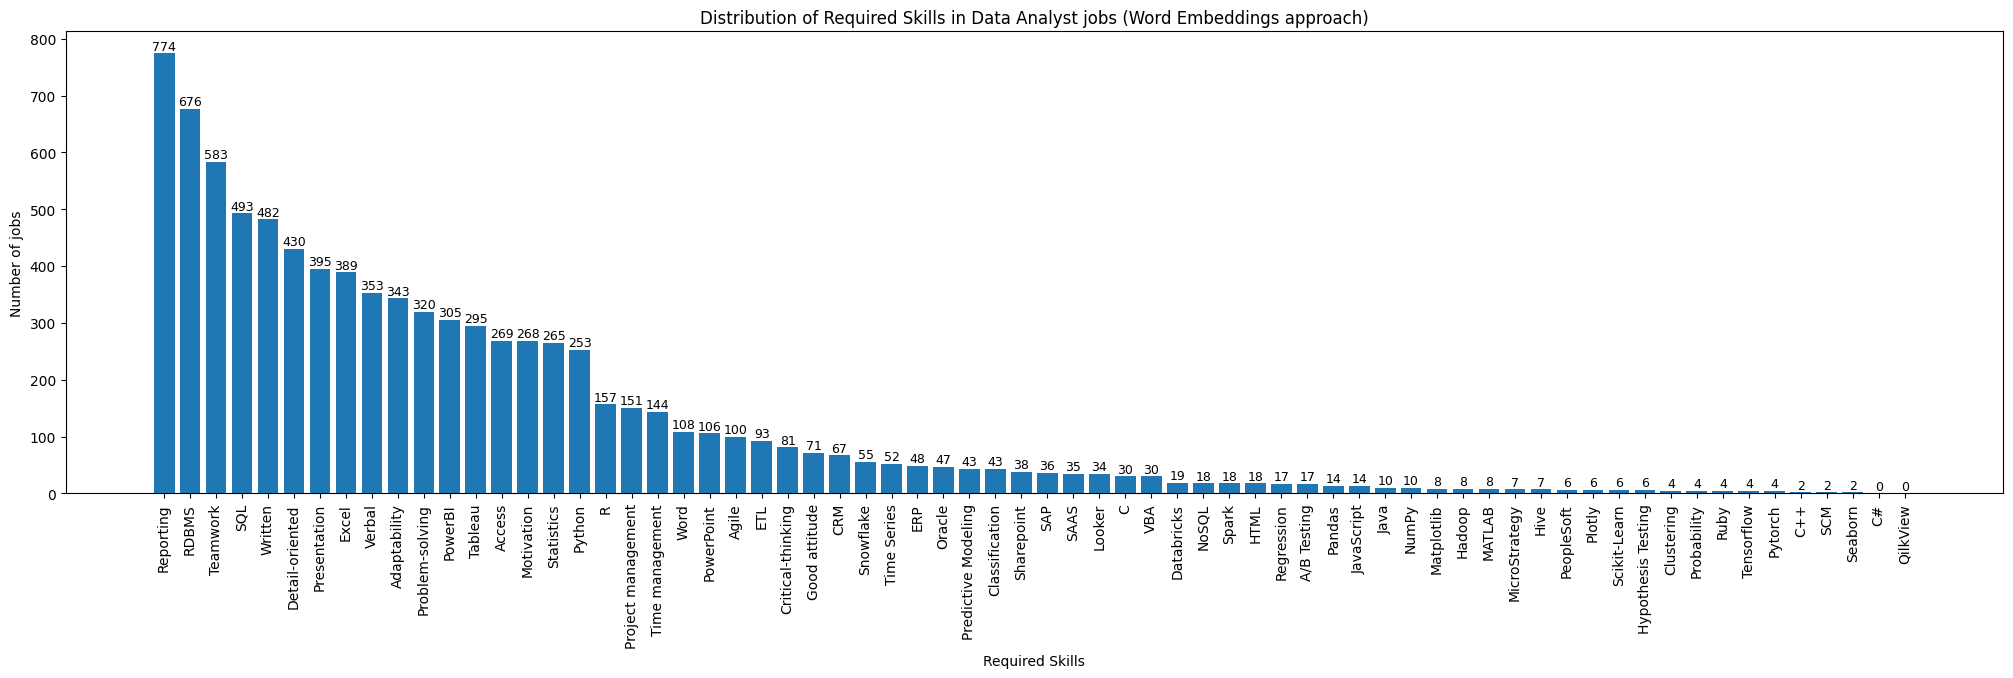

In [ ]:
plt.figure(figsize=(25, 6))
plt.xticks(rotation=90, fontsize=10)
for i, value in enumerate(rearranged_sum_skills_word_embeddings['Number of jobs']):
    plt.text(i, value + 1, str(value), ha='center', va='bottom', fontsize=9)

plt.bar(rearranged_sum_skills_word_embeddings.index, rearranged_sum_skills_word_embeddings['Number of jobs'], align='center')
plt.xlabel('Required Skills')
plt.ylabel('Number of jobs')
plt.title('Distribution of Required Skills in Data Analyst jobs (Word Embeddings approach)')
plt.show()

**Word cloud**: Display the top required skills for Data Analyst jobs (Word embeddings approach)

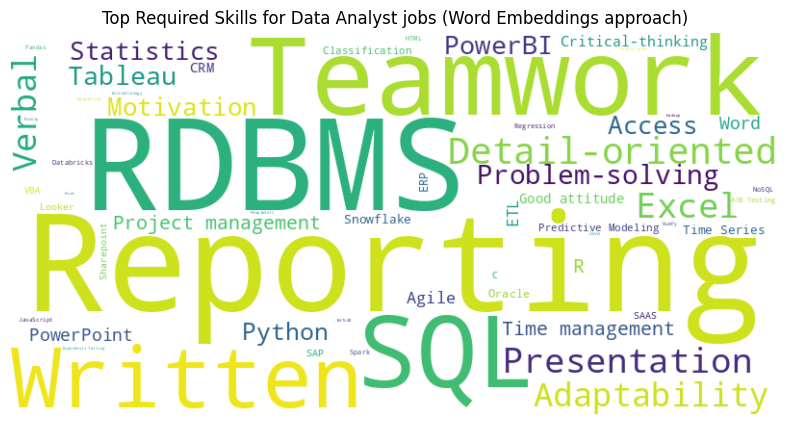

In [ ]:
sum_individual_skills_dict_word_embeddings = dict(zip(rearranged_sum_skills_word_embeddings.index, rearranged_sum_skills_word_embeddings['Number of jobs']))
sum_individual_skills_wordcloud_word_embeddings = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(sum_individual_skills_dict_word_embeddings)
plt.figure(figsize=(10, 5))
plt.imshow(sum_individual_skills_wordcloud_word_embeddings, interpolation='bilinear')
plt.axis('off')
plt.title('Top Required Skills for Data Analyst jobs (Word Embeddings approach)')
plt.show()

## Evaluation for selecting the better approach

In [ ]:
# Import the labeled dataset that I manually read to detect required skills from job description (containing 200 jobs)
ground_truth = pd.read_csv("/content/drive/My Drive/Colab Notebooks/labeled_dataset_200.csv")
ground_truth.head(10)

Position  \
0         Board Certified Behavior Analyst   
1  Board Certified Behavior Analyst (BCBA)   
2  Board Certified Behavior Analyst (BCBA)   
3  Board Certified Behavior Analyst (BCBA)   
4                      Senior Data Analyst   
5                             Data Analyst   
6         eDiscovery Data Analyst Position   
7                 Entry Level Data Analyst   
8                             Data Analyst   
9                             Data Analyst   

                                                Link  \
0  https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...   
1  https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...   
2  https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...   
3  https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...   
4  https://www.indeed.com/rc/clk?jk=1e61371557d55...   
5  https://www.indeed.com/rc/clk?jk=b77f67967a6be...   
6  https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...   
7  https://www.indeed.com/rc/clk?jk=7f00b26b92d13...   
8  https://www.indeed.com/rc/clk?jk=0b2692cc4601d...   
9  https://www.indeed.com/rc/clk?jk=0e65feee85e91...   

                                          Company  \
0                   Impact Learning & Development   
1                       Proven Behavior Solutions   
2  Keystone Autism and Behavior Interventions LLC   
3                          Pathways Autism Center   
4                                        Calendly   
5                                    Baker Hughes   
6                                    Confidential   
7                               Fiable Consulting   
8                                   Springbuk Inc   
9                                          Glooko   

                      Location  \
0         Rapid City, SD 57702   
1         West Bridgewater, MA   
2                Hillsboro, OH   
3            Atlanta, GA 30328   
4  Remote in Atlanta, GA 30363   
5           Stafford, TX 77477   
6                       Remote   
7                       Remote   
8                       Remote   
9                       Remote   

                                     Job Description  Python  SQL  R  VBA  C  \
0  Job Description\nThe BCBA will provide support...       0    0  0    0  0   
1  PROVEN BEHAVIOR SOLUTIONS VOTED TOP PLACES TO ...       0    0  0    0  0   
2  Board Certified Behavior Analyst (in-home serv...       0    0  0    0  0   
3  Pathways Autism Center is currently hiring for...       0    0  0    0  0   
4  About the team & opportunity\nWhat's so great ...       1    1  0    0  0   
5  Data Analyst\n\nWould you like the opportunity...       0    0  0    0  0   
6  Seeking an eDiscovery Data Analyst with at lea...       0    1  0    0  0   
7  Experience Level - 0 to 2 Years\nEven Freshers...       1    1  0    0  0   
8  Description:\nAt Springbuk, our vision is to p...       1    1  0    0  0   
9  Report: This position reports to Director of D...       1    1  0    0  0   

   ...  Verbal  Written  Detail-oriented  Motivation  Adaptability  \
0  ...       1        1                0           0             1   
1  ...       0        0                0           1             1   
2  ...       1        1                0           0             1   
3  ...       0        0                0           0             1   
4  ...       0        1                0           0             0   
5  ...       1        1                1           0             1   
6  ...       1        1                0           0             0   
7  ...       1        1                1           1             1   
8  ...       0        1                1           1             0   
9  ...       0        1                0           0             1   

   Good attitude  Problem-solving  Critical-thinking  Time management  \
0              0                0                  0                0   
1              0                0                  0                1   
2              0                0                  0                1   
3      

In [ ]:
def evaluation(ground_truth, detected_skills):

    """Function to evaluate the performance of the approach"""

    result = {}
    accuracy_scores, precision_scores, recall_scores, f1_scores = [], [], [] ,[]

    for skill in ground_truth.columns[5:]:

        # Extract true and predicted labels for the current skill
        ground_truth_skill = ground_truth[skill]
        detected_skill = detected_skills[skill]

        # Compute evaluation metrics for the current skill
        accuracy = accuracy_score(ground_truth_skill, detected_skill)
        precision = precision_score(ground_truth_skill, detected_skill)
        recall = recall_score(ground_truth_skill, detected_skill)
        f1 = f1_score(ground_truth_skill, detected_skill)

        # Append scores to the corresponding lists
        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

    # Calculate the average scores for each metric
    average_accuracy = str((sum(accuracy_scores) * 100 / len(accuracy_scores)).round(2)) + '%'
    average_precision = str((sum(precision_scores) * 100 / len(precision_scores)).round(2)) + '%'
    average_recall = str((sum(recall_scores) * 100 / len(recall_scores)).round(2)) + '%'
    average_f1 = str((sum(f1_scores) * 100 / len(f1_scores)).round(2)) + '%'

    # Put the average score into the result dictionary
    result["Accuracy"] = average_accuracy
    result["Precision"] = average_precision
    result["Recall"] = average_recall
    result["F1 scores"] = average_f1

    return result

# Call the function to evaluate the approachs
result_rule_based = evaluation(ground_truth, individual_skill_counts_rule_based[:200])
result_word_embeddings = evaluation(ground_truth, individual_skill_counts_word_embeddings[:200])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precis

In [ ]:
# Print to show the preformance of each approach
print(f"Result of Rule-based approach\n{result_rule_based}\n")
print(f"Result of Word embeddings approach\n{result_word_embeddings}")

Result of Rule-based approach
{'Accuracy': '99.84%', 'Precision': '86.25%', 'Recall': '88.12%', 'F1 scores': '86.97%'}

Result of Word embeddings approach
{'Accuracy': '99.84%', 'Precision': '86.25%', 'Recall': '88.12%', 'F1 scores': '86.97%'}


## Summary the performance of both approaches

From the results above, it's evident that both approaches perform equally well in detecting skills from job descriptions. However, the Word Embeddings approach demonstrates significantly faster execution, taking only 213 seconds compared to the Rule-based approach, which requires 3899 seconds.

Therefore, this case we should use Word Embeddings approach.

# 4) Data Interpretation

### 4.1 Overall required skills by each category

In [ ]:
skill_categories = {
    'Programming': ['Python', 'SQL', 'R', 'VBA', 'C', 'C++', 'C#', 'Java', 'JavaScript', 'HTML', 'Ruby'],
    'Database Management System': ['RDBMS', 'NoSQL'],
    'Statistics for Data Analysis': ['Excel', 'Statistics', 'Probability', 'Hypothesis Testing',
                                     'A/B Testing', 'MATLAB', 'Time Series', 'Pandas', 'NumPy'],
    'Data Visualization': ['Tableau', 'PowerBI', 'Looker', 'QilkView', 'MicroStrategy',
                           'Plotly', 'Matplotlib', 'Seaborn', 'Excel'],
    'Machine Learning': ['Regression', 'Classification', 'Clustering', 'Predictive Modeling', 'Tensorflow',
                         'Pytorch', 'Scikit-Learn'],
    'Big Data Technologies': ['Hadoop', 'Spark', 'Hive', 'Databricks', 'Snowflake', 'ETL'],
    'Enterprise system': ['SAP', 'SCM', 'CRM', 'ERP', 'SAAS', 'PeopleSoft', 'Oracle', 'Sharepoint'],
    'Communication': ['Presentation', 'Reporting', 'Verbal', 'Written', 'Word', 'PowerPoint'],
    'Employee attributes': ['Teamwork', 'Critical-thinking', 'Time management', 'Project management', 'Agile',
                            'Problem-solving', 'Detail-oriented', 'Motivation', 'Adaptability', 'Good attitude']
}

In [ ]:
def sum_skills_categories(skill_categories, skill_keywords, individual_skill_counts):

    # Initialize the dictionary to store the sum of required skills for each category
    sum_categories = {}
    for category in skill_categories:
        sum_categories[category] = 0

    # Iterate to get the sum of required skills for each category
    for i in range(len(individual_skill_counts)):
        count = [0, 0, 0, 0, 0, 0, 0, 0, 0]
        for skill in skill_keywords:
            if all(x == 1 for x in count):
                break
            if individual_skill_counts.loc[i, skill] != 1:
                continue
            for j, category in enumerate(skill_categories):
                if (skill in skill_categories[category]) and (count[j] == 0):
                    count[j] = 1
                    continue
        for k, category in enumerate(skill_categories):
            sum_categories[category] += count[k]

    return sum_categories

sum_categories = sum_skills_categories(skill_categories, skill_keywords, individual_skill_counts_word_embeddings)

# Create the dataframe of the sum of required skills by categories
sum_categories_df = pd.DataFrame(sum_categories, index=['Number of jobs'])

# Show the number of jobs require the specific skills by categories
rearranged_sum_categories_df = sum_categories_df.T.sort_values(by='Number of jobs', ascending=False)
rearranged_sum_categories_df['%Percentage (1,004 jobs)'] = (rearranged_sum_categories_df['Number of jobs']*100/len(individual_skill_counts_df)).round(2).astype(str) + '%'

In [ ]:
# Check the dataset
rearranged_sum_categories_df

Number of jobs %Percentage (1,004 jobs)
Communication                            904                   90.04%
Employee attributes                      890                   88.65%
Database Management System               677                   67.43%
Data Visualization                       617                   61.45%
Programming                              580                   57.77%
Statistics for Data Analysis             561                   55.88%
Enterprise system                        220                   21.91%
Big Data Technologies                    153                   15.24%
Machine Learning                         107                   10.66%

**Bar chart**: Display the number of jobs require skills in each category by descending order

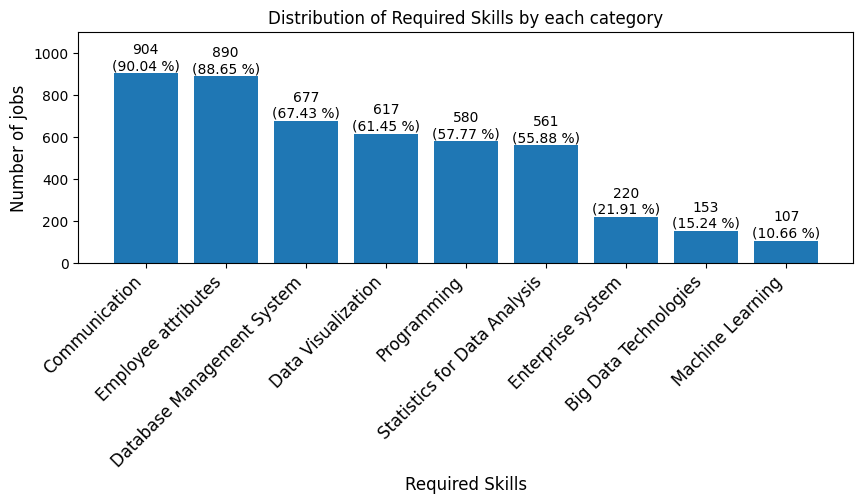

In [ ]:
plt.figure(figsize=(10, 3))
plt.xticks(rotation=45, ha='right', fontsize=12)
for i, value in enumerate(rearranged_sum_categories_df['Number of jobs']):
    plt.text(i, value + 1, f"{value}\n({value*100/len(individual_skill_counts_df):.2f} %)", ha='center', va='bottom', fontsize=10)

plt.bar(rearranged_sum_categories_df.index, rearranged_sum_categories_df['Number of jobs'], align='center')
plt.xlabel('Required Skills', fontsize=12)
plt.ylabel('Number of jobs', fontsize=12)
plt.ylim(0, 1100)
plt.title('Distribution of Required Skills by each category', fontsize=12)
plt.show()

### 4.2 Technical & Soft skills

#### 4.2.1 Technical skills
- Programming
- Database Management System
- Statistics for Data Analysis
- Data Visualization
- Machine Learning
- Big Data Technologies
- Enterprise system.

In [ ]:
technical_skills_categories = {'Programming',
                               'Database Management System',
                               'Statistics for Data Analysis',
                               'Data Visualization',
                               'Machine Learning',
                               'Big Data Technologies',
                               'Enterprise system'}

# Get the dataframe containing the number of jobs required technical skills by individual skills
technical_skills = set()
for key, value in skill_categories.items():
    if key in technical_skills_categories:
        for skill in value:
            technical_skills.add(skill)
sum_technical_skills = {}
for key, value in sum_skills.items():
    if key in technical_skills:
        sum_technical_skills[key] = value
sum_technical_skills_df = pd.DataFrame(sum_technical_skills, index=['Number of jobs'])

# Get the dataframe containing the number of jobs required technical skills by categories
sum_technical_skills_categories = {}
for key, value in sum_categories.items():
    if key in technical_skills_categories:
        sum_technical_skills_categories[key] = value
sum_technical_skills_categories_df = pd.DataFrame(sum_technical_skills_categories, index=['Number of jobs'])

##### By individual skills

In [ ]:
# Transpose and sort the datafrom to better visual form
rearranged_sum_technical_skills_df = sum_technical_skills_df.T.sort_values(by='Number of jobs', ascending=False)

# Add the column showing the percentage of the required skills from the total jobs
rearranged_sum_technical_skills_df['%Percentage (1,004 jobs)'] = (rearranged_sum_technical_skills_df['Number of jobs']*100/len(individual_skill_counts_df)).round(2).astype(str) + '%'
rearranged_sum_technical_skills_df.head(10)

Number of jobs %Percentage (1,004 jobs)
RDBMS                  676                   67.33%
SQL                    493                    49.1%
Excel                  389                   38.75%
PowerBI                305                   30.38%
Tableau                295                   29.38%
Statistics             265                   26.39%
Python                 253                    25.2%
R                      157                   15.64%
ETL                     93                    9.26%
CRM                     67                    6.67%

**Bar chart**: Display the distribution of required technical skills for Data Analyst jobs by descending order

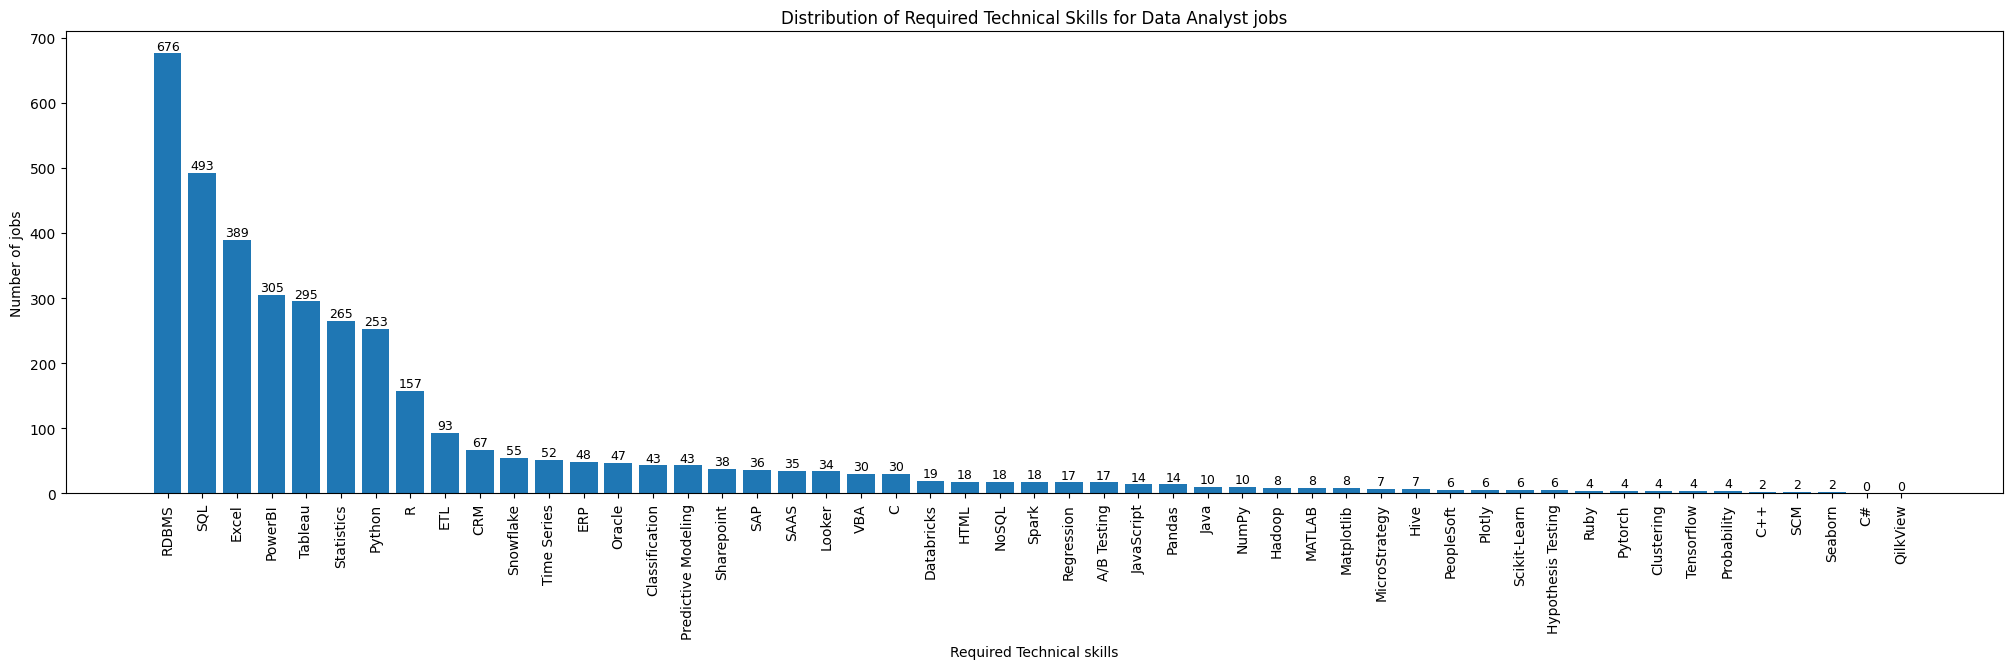

In [ ]:
plt.figure(figsize=(25, 6))
plt.xticks(rotation=90, fontsize=10)
for i, value in enumerate(rearranged_sum_technical_skills_df['Number of jobs']):
    plt.text(i, value + 1, str(value), ha='center', va='bottom', fontsize=9)

plt.bar(rearranged_sum_technical_skills_df.index, rearranged_sum_technical_skills_df['Number of jobs'], align='center')
plt.xlabel('Required Technical skills')
plt.ylabel('Number of jobs')
plt.title('Distribution of Required Technical Skills for Data Analyst jobs')
plt.show()

**Word cloud**: Display the top required technical skills for Data Analyst jobs

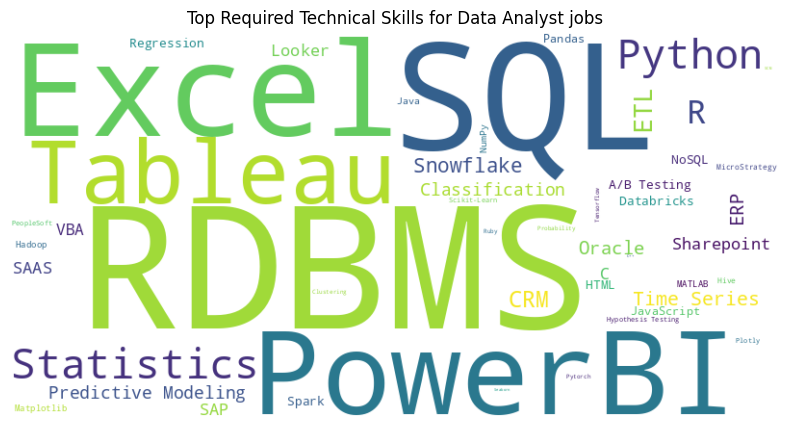

In [ ]:
sum_individual_technical_skills_dict = dict(zip(rearranged_sum_technical_skills_df.index, rearranged_sum_technical_skills_df['Number of jobs']))
sum_individual_technical_skills_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(sum_individual_technical_skills_dict)
plt.figure(figsize=(10, 5))
plt.imshow(sum_individual_technical_skills_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top Required Technical Skills for Data Analyst jobs')
plt.show()

##### By categories

In [ ]:
# Transpose and sort the datafrom to better visual form
rearranged_sum_technical_skills_categories_df = sum_technical_skills_categories_df.T.sort_values(by='Number of jobs', ascending=False)

# Add the column showing the percentage of the required skills from the total jobs
rearranged_sum_technical_skills_categories_df['%Percentage (1,004 jobs)'] = (rearranged_sum_technical_skills_categories_df['Number of jobs']*100/len(individual_skill_counts_df)).round(2).astype(str) + '%'
rearranged_sum_technical_skills_categories_df.head(10)

Number of jobs %Percentage (1,004 jobs)
Database Management System               677                   67.43%
Data Visualization                       617                   61.45%
Programming                              580                   57.77%
Statistics for Data Analysis             561                   55.88%
Enterprise system                        220                   21.91%
Big Data Technologies                    153                   15.24%
Machine Learning                         107                   10.66%

**Bar chart**: Display the number of jobs require technical skills by categories

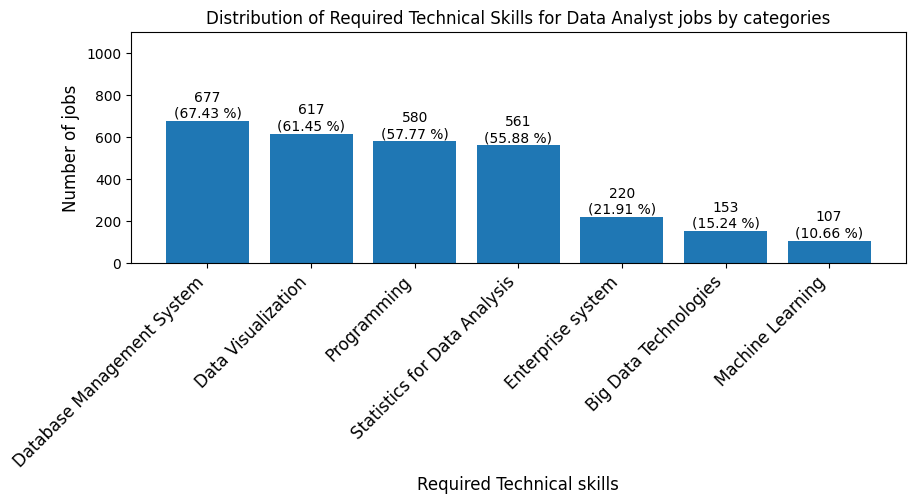

In [ ]:
plt.figure(figsize=(10, 3))
plt.xticks(rotation=45, ha='right', fontsize=12)
for i, value in enumerate(rearranged_sum_technical_skills_categories_df['Number of jobs']):
    plt.text(i, value + 1, f"{value}\n({value*100/len(individual_skill_counts_df):.2f} %)", ha='center', va='bottom', fontsize=10)

plt.bar(rearranged_sum_technical_skills_categories_df.index, rearranged_sum_technical_skills_categories_df['Number of jobs'], align='center')
plt.xlabel('Required Technical skills', fontsize=12)
plt.ylabel('Number of jobs', fontsize=12)
plt.ylim(0, 1100)
plt.title('Distribution of Required Technical Skills for Data Analyst jobs by categories', fontsize=12)
plt.show()

#### 4.2.2 Soft skills
- Communication
- Employee attributes

##### By individual skills

In [ ]:
soft_skills_categories = {'Communication', 'Employee attributes'}

# Get the dataframe containing the number of jobs required soft skills by individual skills
soft_skills = set()
for key, value in skill_categories.items():
    if key in soft_skills_categories:
        for skill in value:
            soft_skills.add(skill)
sum_soft_skills = {}
for key, value in sum_skills.items():
    if key in soft_skills:
        sum_soft_skills[key] = value
sum_soft_skills_df = pd.DataFrame(sum_soft_skills, index=['Number of jobs'])

# Get the dataframe containing the number of jobs required soft skills by categories
sum_soft_skills_categories = {}
for key, value in sum_categories.items():
    if key in soft_skills_categories:
        sum_soft_skills_categories[key] = value
sum_soft_skills_categories_df = pd.DataFrame(sum_soft_skills_categories, index=['Number of jobs'])

In [ ]:
# Transpose and sort the datafrom to better visual form
rearranged_sum_soft_skills_df = sum_soft_skills_df.T.sort_values(by='Number of jobs', ascending=False)

# Add the column showing the percentage of the required skills from the total jobs
rearranged_sum_soft_skills_df['%Percentage (1,004 jobs)'] = (rearranged_sum_soft_skills_df['Number of jobs']*100/len(individual_skill_counts_df)).round(2).astype(str) + '%'
rearranged_sum_soft_skills_df.head(10)

Number of jobs %Percentage (1,004 jobs)
Reporting                      774                   77.09%
Teamwork                       583                   58.07%
Written                        482                   48.01%
Detail-oriented                430                   42.83%
Presentation                   395                   39.34%
Verbal                         353                   35.16%
Adaptability                   343                   34.16%
Problem-solving                320                   31.87%
Motivation                     268                   26.69%
Project management             151                   15.04%

**Bar chart**: Display the distribution of required soft skills for Data Analyst jobs by descending order

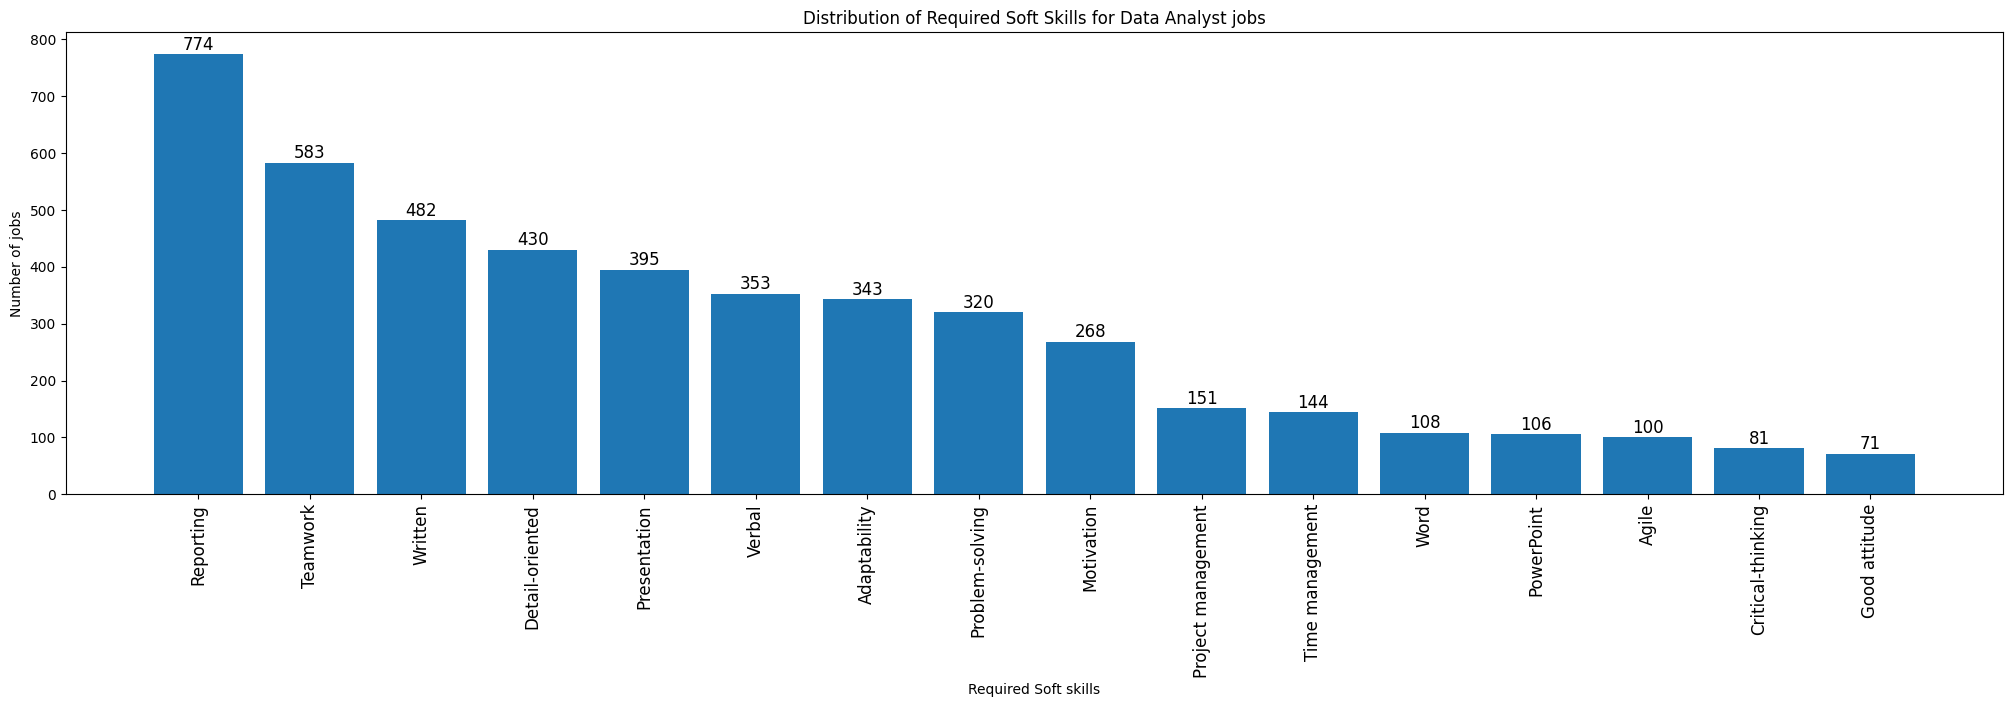

In [ ]:
plt.figure(figsize=(25, 6))
plt.xticks(rotation=90, fontsize=12)
for i, value in enumerate(rearranged_sum_soft_skills_df['Number of jobs']):
    plt.text(i, value + 1, str(value), ha='center', va='bottom', fontsize=12)

plt.bar(rearranged_sum_soft_skills_df.index, rearranged_sum_soft_skills_df['Number of jobs'], align='center')
plt.xlabel('Required Soft skills')
plt.ylabel('Number of jobs')
plt.title('Distribution of Required Soft Skills for Data Analyst jobs')
plt.show()

**Word cloud**: Display the volumn of each soft skill that is require for Data Analyst jobs

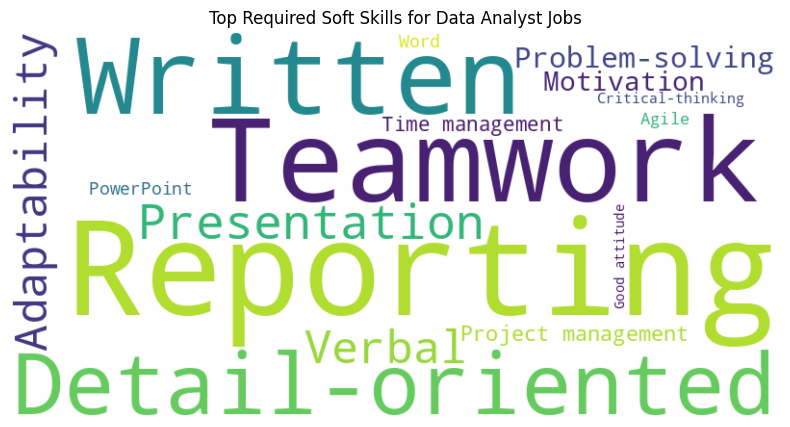

In [ ]:
sum_individual_soft_skills_dict = dict(zip(rearranged_sum_soft_skills_df.index, rearranged_sum_soft_skills_df['Number of jobs']))
sum_individual_soft_skills_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(sum_individual_soft_skills_dict)
plt.figure(figsize=(10, 5))
plt.imshow(sum_individual_soft_skills_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top Required Soft Skills for Data Analyst Jobs')
plt.show()

##### By categories

In [ ]:
# Transpose and sort the datafrom to better visual form
rearranged_sum_soft_skills_categories_df = sum_soft_skills_categories_df.T.sort_values(by='Number of jobs', ascending=False)

# Add the column showing the percentage of the required skills from the total jobs
rearranged_sum_soft_skills_categories_df['%Percentage (1,004 jobs)'] = (rearranged_sum_soft_skills_categories_df['Number of jobs']*100/len(individual_skill_counts_df)).round(2).astype(str) + '%'
rearranged_sum_soft_skills_categories_df.head(10)

Number of jobs %Percentage (1,004 jobs)
Communication                   904                   90.04%
Employee attributes             890                   88.65%

**Bar chart**: Display the distribution of required soft skills for data analyst jobs by categories

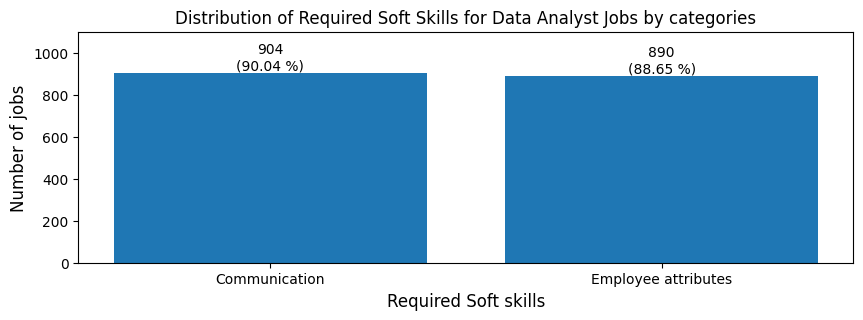

In [ ]:
plt.figure(figsize=(10, 3))
for i, value in enumerate(rearranged_sum_soft_skills_categories_df['Number of jobs']):
    plt.text(i, value + 1, f"{value}\n({value*100/len(individual_skill_counts_df):.2f} %)", ha='center', va='bottom', fontsize=10)

plt.bar(rearranged_sum_soft_skills_categories_df.index, rearranged_sum_soft_skills_categories_df['Number of jobs'], align='center')
plt.xlabel('Required Soft skills', fontsize=12)
plt.ylabel('Number of jobs', fontsize=12)
plt.ylim(0, 1100)
plt.title('Distribution of Required Soft Skills for Data Analyst Jobs by categories', fontsize=12)
plt.show()

### 4.3 Programming category

In [ ]:
# Get the dataframe containing the number of jobs required programming skills
sum_programming_skills = {}
for skill in skill_categories['Programming']:
    sum_programming_skills[skill] = sum_skills[skill]
sum_programming_skills_df = pd.DataFrame(sum_programming_skills, index=['Number of jobs'])
rearranged_sum_progarmming_skills_df = sum_programming_skills_df.T.sort_values(by='Number of jobs', ascending=False)
rearranged_sum_progarmming_skills_df['%Percentage (1,004 jobs)'] = (rearranged_sum_progarmming_skills_df['Number of jobs']*100/len(individual_skill_counts_df)).round(2).astype(str) + '%'
rearranged_sum_progarmming_skills_df

Number of jobs %Percentage (1,004 jobs)
SQL                    493                    49.1%
Python                 253                    25.2%
R                      157                   15.64%
VBA                     30                    2.99%
C                       30                    2.99%
HTML                    18                    1.79%
JavaScript              14                    1.39%
Java                    10                     1.0%
Ruby                     4                     0.4%
C++                      2                     0.2%
C#                       0                     0.0%

**Bar chart**: Display the distribution of required programming skills by each language

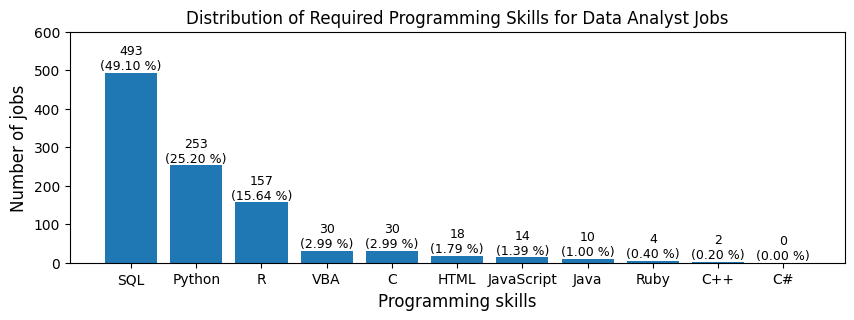

In [ ]:
plt.figure(figsize=(10, 3))
for i, value in enumerate(rearranged_sum_progarmming_skills_df['Number of jobs']):
    plt.text(i, value + 1, f"{value}\n({value*100/len(individual_skill_counts_df):.2f} %)", ha='center', va='bottom', fontsize=9)

plt.bar(rearranged_sum_progarmming_skills_df.index, rearranged_sum_progarmming_skills_df['Number of jobs'], align='center')
plt.xlabel('Programming skills', fontsize=12)
plt.ylabel('Number of jobs', fontsize=12)
plt.ylim(0, 600)
plt.title('Distribution of Required Programming Skills for Data Analyst Jobs', fontsize=12)
plt.show()

### 4.4 Database Management System category

In [ ]:
# Get the dataframe containing the number of jobs required database management system skills
sum_dbms_skills = {}
for skill in skill_categories['Database Management System']:
    sum_dbms_skills[skill] = sum_skills[skill]
sum_dbms_skills_df = pd.DataFrame(sum_dbms_skills, index=['Number of jobs'])
rearranged_sum_dbms_skills_df = sum_dbms_skills_df.T.sort_values(by='Number of jobs', ascending=False)
rearranged_sum_dbms_skills_df['%Percentage (1,004 jobs)'] = (rearranged_sum_dbms_skills_df['Number of jobs']*100/len(individual_skill_counts_df)).round(2).astype(str) + '%'
rearranged_sum_dbms_skills_df

Number of jobs %Percentage (1,004 jobs)
RDBMS             676                   67.33%
NoSQL              18                    1.79%

**Bar chart**: Display the distribution of required Database Management System skills

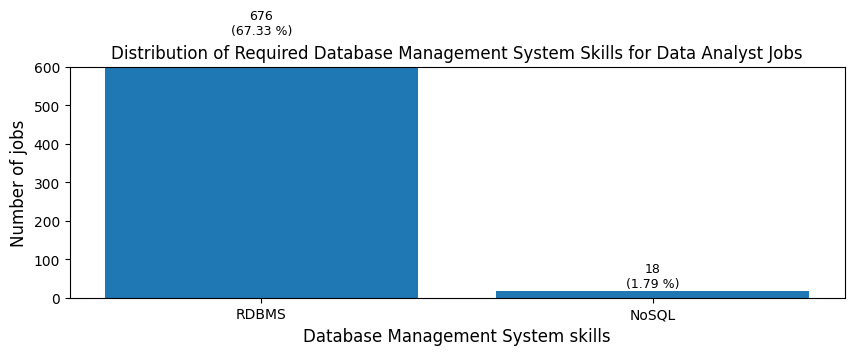

In [ ]:
plt.figure(figsize=(10, 3))
for i, value in enumerate(rearranged_sum_dbms_skills_df['Number of jobs']):
    plt.text(i, value + 1, f"{value}\n({value*100/len(individual_skill_counts_df):.2f} %)", ha='center', va='bottom', fontsize=9)

plt.bar(rearranged_sum_dbms_skills_df.index, rearranged_sum_dbms_skills_df['Number of jobs'], align='center')
plt.xlabel('Database Management System skills', fontsize=12)
plt.ylabel('Number of jobs', fontsize=12)
plt.ylim(0, 600)
plt.title('Distribution of Required Database Management System Skills for Data Analyst Jobs', fontsize=12)
plt.show()

### 4.5 Statistics for Data Analysis category

In [ ]:
# Get the dataframe containing the number of jobs required statistics for data analysis skills
sum_stat_skills = {}
for skill in skill_categories['Statistics for Data Analysis']:
    sum_stat_skills[skill] = sum_skills[skill]
sum_stat_skills_df = pd.DataFrame(sum_stat_skills, index=['Number of jobs'])
rearranged_sum_stat_skills_df = sum_stat_skills_df.T.sort_values(by='Number of jobs', ascending=False)
rearranged_sum_stat_skills_df['%Percentage (1,004 jobs)'] = (rearranged_sum_stat_skills_df['Number of jobs']*100/len(individual_skill_counts_df)).round(2).astype(str) + '%'
rearranged_sum_stat_skills_df

Number of jobs %Percentage (1,004 jobs)
Excel                          389                   38.75%
Statistics                     265                   26.39%
Time Series                     52                    5.18%
A/B Testing                     17                    1.69%
Pandas                          14                    1.39%
NumPy                           10                     1.0%
MATLAB                           8                     0.8%
Hypothesis Testing               6                     0.6%
Probability                      4                     0.4%

**Bar chart**: Display the distribution of required Statistics for Data Analysis skills

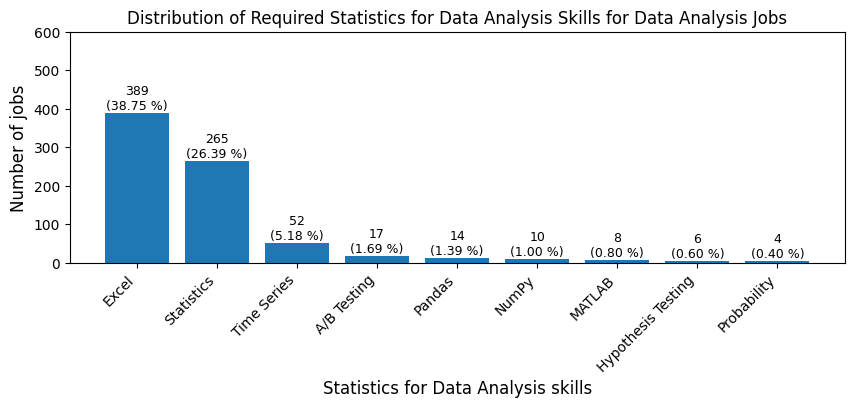

In [ ]:
plt.figure(figsize=(10, 3))
plt.xticks(rotation=45, ha='right')
for i, value in enumerate(rearranged_sum_stat_skills_df['Number of jobs']):
    plt.text(i, value + 1, f"{value}\n({value*100/len(individual_skill_counts_df):.2f} %)", ha='center', va='bottom', fontsize=9)

plt.bar(rearranged_sum_stat_skills_df.index, rearranged_sum_stat_skills_df['Number of jobs'], align='center')
plt.xlabel('Statistics for Data Analysis skills', fontsize=12)
plt.ylabel('Number of jobs', fontsize=12)
plt.ylim(0, 600)
plt.title('Distribution of Required Statistics for Data Analysis Skills for Data Analysis Jobs', fontsize=12)
plt.show()

### 4.6 Data Visualization category



In [ ]:
# Get the dataframe containing the number of jobs required data visualization skills
sum_datavis_skills = {}
for skill in skill_categories['Data Visualization']:
    sum_datavis_skills[skill] = sum_skills[skill]
sum_datavis_skills_df = pd.DataFrame(sum_datavis_skills, index=['Number of jobs'])
rearranged_sum_datavis_skills_df = sum_datavis_skills_df.T.sort_values(by='Number of jobs', ascending=False)
rearranged_sum_datavis_skills_df['%Percentage (1,004 jobs)'] = (rearranged_sum_datavis_skills_df['Number of jobs']*100/len(individual_skill_counts_df)).round(2).astype(str) + '%'
rearranged_sum_datavis_skills_df

Number of jobs %Percentage (1,004 jobs)
Excel                     389                   38.75%
PowerBI                   305                   30.38%
Tableau                   295                   29.38%
Looker                     34                    3.39%
Matplotlib                  8                     0.8%
MicroStrategy               7                     0.7%
Plotly                      6                     0.6%
Seaborn                     2                     0.2%
QilkView                    0                     0.0%

**Bar chart**: Display the distribution of required Data Visualization skills

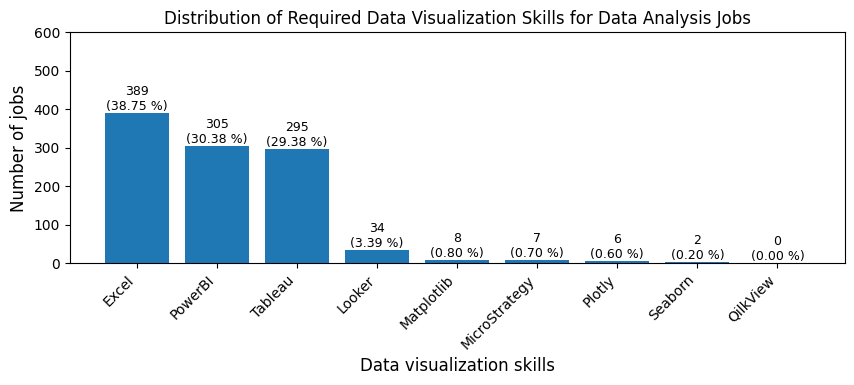

In [ ]:
plt.figure(figsize=(10, 3))
plt.xticks(rotation=45, ha='right')
for i, value in enumerate(rearranged_sum_datavis_skills_df['Number of jobs']):
    plt.text(i, value + 1, f"{value}\n({value*100/len(individual_skill_counts_df):.2f} %)", ha='center', va='bottom', fontsize=9)

plt.bar(rearranged_sum_datavis_skills_df.index, rearranged_sum_datavis_skills_df['Number of jobs'], align='center')
plt.xlabel('Data visualization skills', fontsize=12)
plt.ylabel('Number of jobs', fontsize=12)
plt.ylim(0, 600)
plt.title('Distribution of Required Data Visualization Skills for Data Analysis Jobs', fontsize=12)
plt.show()

### 4.7 Machine Learning category

In [ ]:
# Get the dataframe containing the number of jobs required machine learning skills
sum_ml_skills = {}
for skill in skill_categories['Machine Learning']:
    sum_ml_skills[skill] = sum_skills[skill]
sum_ml_skills_df = pd.DataFrame(sum_ml_skills, index=['Number of jobs'])
rearranged_sum_ml_skills_df = sum_ml_skills_df.T.sort_values(by='Number of jobs', ascending=False)
rearranged_sum_ml_skills_df['%Percentage (1,004 jobs)'] = (rearranged_sum_ml_skills_df['Number of jobs']*100/len(individual_skill_counts_df)).round(2).astype(str) + '%'
rearranged_sum_ml_skills_df

Number of jobs %Percentage (1,004 jobs)
Classification                   43                    4.28%
Predictive Modeling              43                    4.28%
Regression                       17                    1.69%
Scikit-Learn                      6                     0.6%
Clustering                        4                     0.4%
Tensorflow                        4                     0.4%
Pytorch                           4                     0.4%

**Bar chart**: Display the distribution of required Machine Learning skills

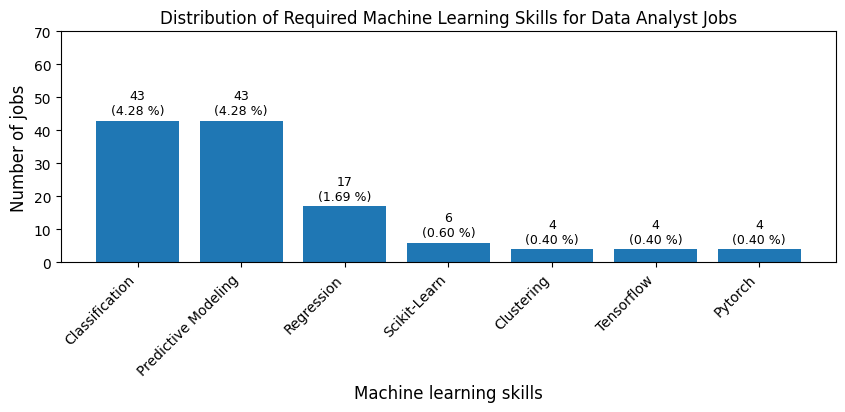

In [ ]:
plt.figure(figsize=(10, 3))
plt.xticks(rotation=45, ha='right')
for i, value in enumerate(rearranged_sum_ml_skills_df['Number of jobs']):
    plt.text(i, value + 1, f"{value}\n({value*100/len(individual_skill_counts_df):.2f} %)", ha='center', va='bottom', fontsize=9)

plt.bar(rearranged_sum_ml_skills_df.index, rearranged_sum_ml_skills_df['Number of jobs'], align='center')
plt.xlabel('Machine learning skills', fontsize=12)
plt.ylabel('Number of jobs', fontsize=12)
plt.ylim(0, 70)
plt.title('Distribution of Required Machine Learning Skills for Data Analyst Jobs', fontsize=12)
plt.show()

### 4.8 Big Data Technologies category

In [ ]:
# Get the dataframe containing the number of jobs required big data technologies skills
sum_bigdata_skills = {}
for skill in skill_categories['Big Data Technologies']:
    sum_bigdata_skills[skill] = sum_skills[skill]
sum_bigdata_skills_df = pd.DataFrame(sum_bigdata_skills, index=['Number of jobs'])
rearranged_sum_bigdata_skills_df = sum_bigdata_skills_df.T.sort_values(by='Number of jobs', ascending=False)
rearranged_sum_bigdata_skills_df['%Percentage (1,004 jobs)'] = (rearranged_sum_bigdata_skills_df['Number of jobs']*100/len(individual_skill_counts_df)).round(2).astype(str) + '%'
rearranged_sum_bigdata_skills_df

Number of jobs %Percentage (1,004 jobs)
ETL                     93                    9.26%
Snowflake               55                    5.48%
Databricks              19                    1.89%
Spark                   18                    1.79%
Hadoop                   8                     0.8%
Hive                     7                     0.7%

**Bar chart**: Display the distribution of required Big Data Technologies skills

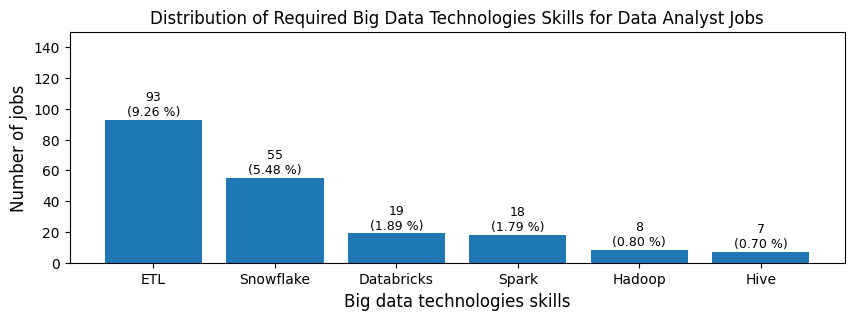

In [ ]:
plt.figure(figsize=(10, 3))
for i, value in enumerate(rearranged_sum_bigdata_skills_df['Number of jobs']):
    plt.text(i, value + 1, f"{value}\n({value*100/len(individual_skill_counts_df):.2f} %)", ha='center', va='bottom', fontsize=9)

plt.bar(rearranged_sum_bigdata_skills_df.index, rearranged_sum_bigdata_skills_df['Number of jobs'], align='center')
plt.xlabel('Big data technologies skills', fontsize=12)
plt.ylabel('Number of jobs', fontsize=12)
plt.ylim(0, 150)
plt.title('Distribution of Required Big Data Technologies Skills for Data Analyst Jobs', fontsize=12)
plt.show()

### 4.9 Enterprise system category

In [ ]:
# Get the dataframe containing the number of jobs required enterprise system skills
sum_entsys_skills = {}
for skill in skill_categories['Enterprise system']:
    sum_entsys_skills[skill] = sum_skills[skill]
sum_entsys_skills_df = pd.DataFrame(sum_entsys_skills, index=['Number of jobs'])
rearranged_sum_entsys_skills_df = sum_entsys_skills_df.T.sort_values(by='Number of jobs', ascending=False)
rearranged_sum_entsys_skills_df['%Percentage (1,004 jobs)'] = (rearranged_sum_entsys_skills_df['Number of jobs']*100/len(individual_skill_counts_df)).round(2).astype(str) + '%'
rearranged_sum_entsys_skills_df

Number of jobs %Percentage (1,004 jobs)
CRM                     67                    6.67%
ERP                     48                    4.78%
Oracle                  47                    4.68%
Sharepoint              38                    3.78%
SAP                     36                    3.59%
SAAS                    35                    3.49%
PeopleSoft               6                     0.6%
SCM                      2                     0.2%

**Bar chart**: Display the distribution of required Enterprise system skills

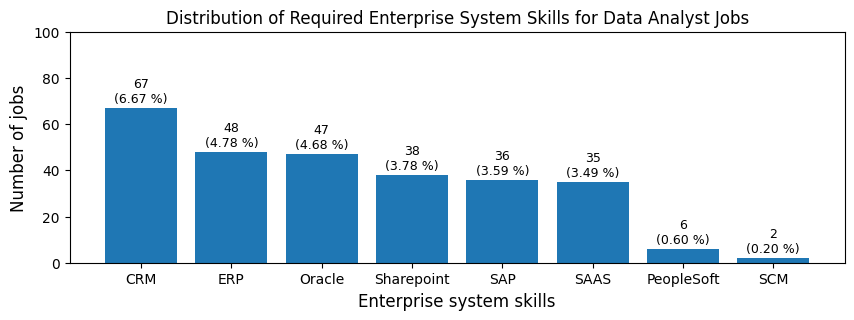

In [ ]:
plt.figure(figsize=(10, 3))
for i, value in enumerate(rearranged_sum_entsys_skills_df['Number of jobs']):
    plt.text(i, value + 1, f"{value}\n({value*100/len(individual_skill_counts_df):.2f} %)", ha='center', va='bottom', fontsize=9)

plt.bar(rearranged_sum_entsys_skills_df.index, rearranged_sum_entsys_skills_df['Number of jobs'], align='center')
plt.xlabel('Enterprise system skills', fontsize=12)
plt.ylabel('Number of jobs', fontsize=12)
plt.ylim(0, 100)
plt.title('Distribution of Required Enterprise System Skills for Data Analyst Jobs', fontsize=12)
plt.show()

### 4.10 Communication category

In [ ]:
# Get the dataframe containing the number of jobs required communication skills
sum_comm_skills = {}
for skill in skill_categories['Communication']:
    sum_comm_skills[skill] = sum_skills[skill]
sum_comm_skills_df = pd.DataFrame(sum_comm_skills, index=['Number of jobs'])
rearranged_sum_comm_skills_df = sum_comm_skills_df.T.sort_values(by='Number of jobs', ascending=False)
rearranged_sum_comm_skills_df['%Percentage (1,004 jobs)'] = (rearranged_sum_comm_skills_df['Number of jobs']*100/len(individual_skill_counts_df)).round(2).astype(str) + '%'
rearranged_sum_comm_skills_df

Number of jobs %Percentage (1,004 jobs)
Reporting                774                   77.09%
Written                  482                   48.01%
Presentation             395                   39.34%
Verbal                   353                   35.16%
Word                     108                   10.76%
PowerPoint               106                   10.56%

**Bar chart**: Display the distribution of required Communication skills

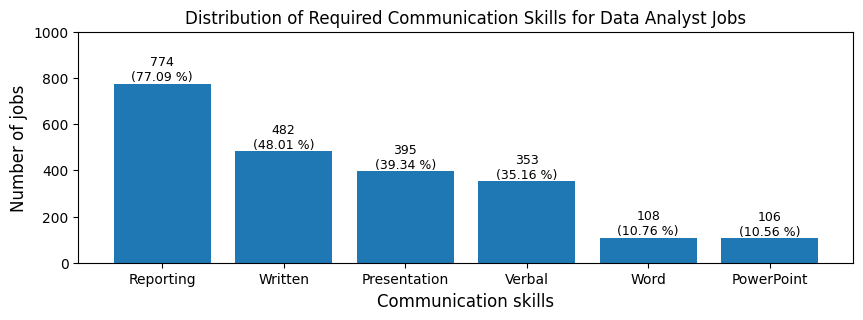

In [ ]:
plt.figure(figsize=(10, 3))
for i, value in enumerate(rearranged_sum_comm_skills_df['Number of jobs']):
    plt.text(i, value + 1, f"{value}\n({value*100/len(individual_skill_counts_df):.2f} %)", ha='center', va='bottom', fontsize=9)

plt.bar(rearranged_sum_comm_skills_df.index, rearranged_sum_comm_skills_df['Number of jobs'], align='center')
plt.xlabel('Communication skills', fontsize=12)
plt.ylabel('Number of jobs', fontsize=12)
plt.ylim(0, 1000)
plt.title('Distribution of Required Communication Skills for Data Analyst Jobs', fontsize=12)
plt.show()

### 4.11 Employee attributes category

In [ ]:
# Get the dataframe containing the number of jobs required employee attributes skills
sum_empatt_skills = {}
for skill in skill_categories['Employee attributes']:
    sum_empatt_skills[skill] = sum_skills[skill]
sum_empatt_skills_df = pd.DataFrame(sum_empatt_skills, index=['Number of jobs'])
rearranged_sum_empatt_skills_df = sum_empatt_skills_df.T.sort_values(by='Number of jobs', ascending=False)
rearranged_sum_empatt_skills_df['%Percentage (1,004 jobs)'] = (rearranged_sum_empatt_skills_df['Number of jobs']*100/len(individual_skill_counts_df)).round(2).astype(str) + '%'
rearranged_sum_empatt_skills_df

Number of jobs %Percentage (1,004 jobs)
Teamwork                       583                   58.07%
Detail-oriented                430                   42.83%
Adaptability                   343                   34.16%
Problem-solving                320                   31.87%
Motivation                     268                   26.69%
Project management             151                   15.04%
Time management                144                   14.34%
Agile                          100                    9.96%
Critical-thinking               81                    8.07%
Good attitude                   71                    7.07%

**Bar chart**: Display the distribution of required Employee attributes skills

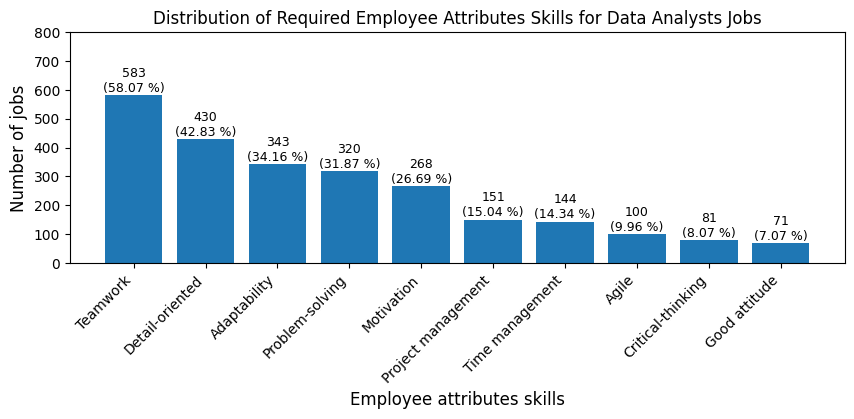

In [ ]:
plt.figure(figsize=(10, 3))
plt.xticks(rotation=45, ha='right')
for i, value in enumerate(rearranged_sum_empatt_skills_df['Number of jobs']):
    plt.text(i, value + 1, f"{value}\n({value*100/len(individual_skill_counts_df):.2f} %)", ha='center', va='bottom', fontsize=9)

plt.bar(rearranged_sum_empatt_skills_df.index, rearranged_sum_empatt_skills_df['Number of jobs'], align='center')
plt.xlabel('Employee attributes skills', fontsize=12)
plt.ylabel('Number of jobs', fontsize=12)
plt.ylim(0, 800)
plt.title('Distribution of Required Employee Attributes Skills for Data Analysts Jobs', fontsize=12)
plt.show()